# Table of Contents

- Importing Necessary Libraries
- Load Datasets
- Exploratory Data Analysis
- Data Preprocessing
- Feature Selection
- Model Implementation
- Model Evaluation
- Model Comparison Report
- Conclusion
- Challenges Faced Report
- Business Case
### To predict the SalePrice of the House based on the given input features

# Objectives

- **Predictive Accuracy:** Develop models that accurately predict house prices based on various features.
- **Market Insights:** Identify key factors that influence house prices. 
 - **Decision Support:** Provide a tool to assist stakeholders in making informed decisions.


In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statistics import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
#Importing the dataset

data = pd.read_csv('housepred.csv')

In [3]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Domain Analysis

In [4]:
with open('data_description.txt', 'r', encoding='utf-8') as file:
    for line in file:
        print(line, end='') 

Feature Information:-
●SalePrice: The property's sale price in dollars. 
●MSSubClass: The building class
●MSZoning: The general zoning classification
●LotFrontage: Linear feet of street connected to property
●LotArea: Lot size in square feet
●Street: Type of road access
●Alley: Type of alley access
●LotShape: General shape of property
●LandContour: Flatness of the property
●Utilities: Type of utilities available
●LotConfig: Lot configuration
●LandSlope: Slope of property
●Neighborhood: Physical locations within Ames city limits
●Condition1: Proximity to main road or railroad
●Condition2: Proximity to main road or railroad (if a second is present)
●BldgType: Type of dwelling
●HouseStyle: Style of dwelling
●OverallQual: Overall material and finish quality
●OverallCond: Overall condition rating
●YearBuilt: Original construction date
●YearRemodAdd: Remodel date
●RoofStyle: Type of roof
●RoofMatl: Roof material
●Exterior1st: Exterior covering on house
●Exterior2nd: Exterior covering on hous

# Basic Checks

In [5]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [8]:
data.shape

(1460, 81)

In [9]:
data.size

118260

In [10]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Insights
 - This dataset contains 1460 records, 80 feature columns and 1 target column
 - The dataset have a total of 118260 entries.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
pd.set_option('display.max_rows',None)
data.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [13]:
data.duplicated().sum()

0

# Insights
 - GarageYrBlt column have 81 missing values.
 - MasVnrArea column have 8 missing values.
 - LotFrontage column have 259 missing values.
 - Alley column have 1369 missing values.
 - MasVnrType column have 872 missing values.
 - BsmtQual column have 37 missing values.
 - BsmtCond column have 37 missing values.
 - BsmtExposure column have 38 missing values.
 - BsmtFinType1 column have 37 missing values.
 - BsmtFinType2 column have 38 missing values.
 - Electrical column have 1 missing value.
 - FireplaceQu column have 690 missing values.
 - GarageType column have 81 missing values.
 - GarageYrBlt column have 81 missing values.
 - GarageFinish column have 81 missing values.
 - GarageQual column have 81 missing value.
 - GarageCond column have 81 missing values. 
 - PoolQC column have 1453 missing values.
 - Fence column have 1179 missing values.
 - MiscFeature column have 1406 missing values.
 - No Duplicate records.
 - There are 38 numerical columns and 43 categorical columns.
 - The memory usage of the dataset is 924.0KB.This indicates that the data consumes a relatively small amount of memory.
 - No missing value for the target variable(SalePrice).

# Descriptive Statistics

In [14]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# Insights

- 75% of the houses have a LotArea below 11601.50 square feet.
- Half of the houses in the dataset do not have any masonry veneer area on their exterior.
- 75% of the houses do not have finishing in the second basement area (BsmtFinSF2), indicating that the majority of houses lack this type of basement finishing.
- A quarter of the houses do not have finishing in the first basement area (BsmtFinSF1).
- Approximately half of the houses in the dataset do not feature a second floor (2ndFlrSF).
- 75% of the houses feature high-quality finishing, as indicated by the absence of low-quality finishing square footage (LowQualFinSF).
- Half of the houses don't have bathrooms in the basement.
- Approximately 75% of the houses in the dataset feature wood deck areas below 168.0 square feet, indicating that the majority have relatively small deck spaces.
- Half of the houses do not have any wood deck area.
- Around 75% of the houses have only 3 bedrooms above basement level, indicating that the majority of houses are designed with 3 bedrooms.
- About 75% of the houses in the dataset feature only one kitchen above the basement level.
- At most, houses in the dataset have 3 kitchens.
- Roughly 25% of the houses in the dataset do not have any type of porch, indicating that a quarter of the houses lack this outdoor feature.
- Approximately 75% of the houses have only open porch areas (OpenPorchSF), suggesting that the majority of houses with porches feature open-air spaces without enclosed structures.
- Approximately 75% of the houses in the dataset do not have a pool, indicating that pools are relatively uncommon among the properties.
- The distribution of GarageArea in the dataset closely resembles a normal distribution.
- Nearly 75% of the houses have garage area capacity for two cars.
- The majority of houses are equipped with 1 or 2 fireplaces, with only a small fraction of properties featuring 3.
- The majority of houses were sold during the first three quarters of the year.
- Approximately 75% of the houses in the dataset do not incur costs related to miscellaneous features.

In [15]:
data.describe(include='O').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

# Insights
 - More than 75% of the houses are zoned as 'RL' (Residential Low Density).
 - The majority of houses have paved street access.
 - Only 91 entries are present in Alley column, indicating more than 90% of the values are missing.
 - Out of the total 1460 entries, 1459 properties have "AllPub" utilities, indicating that the vast majority(99%) of properties have access to all public utilities.
 - Among the properties with masonry veneer(MasVnrType), "BrkFace" (Brick Face) is the most common type, appearing 445 times.
 - GasA is the predominant heating type, used in 1428 out of 1460 houses, indicating a strong preference for gas heating systems in the dataset.

# EDA

In [16]:
data.drop(['Id'],axis=1,inplace=True)

# Insight

 - Dropping Id column before EDA since it has no signifance

Seperating numerical and categorical columns

In [17]:
num_var=data.select_dtypes(exclude=['object'])
num_var.drop(['SalePrice'],axis=1,inplace=True)
cat_var=data.select_dtypes(include=['object'])

In [18]:
print(num_var.shape)
print(cat_var.shape)

(1460, 36)
(1460, 43)


# Univariate Analysis

## Visualising numerical columns

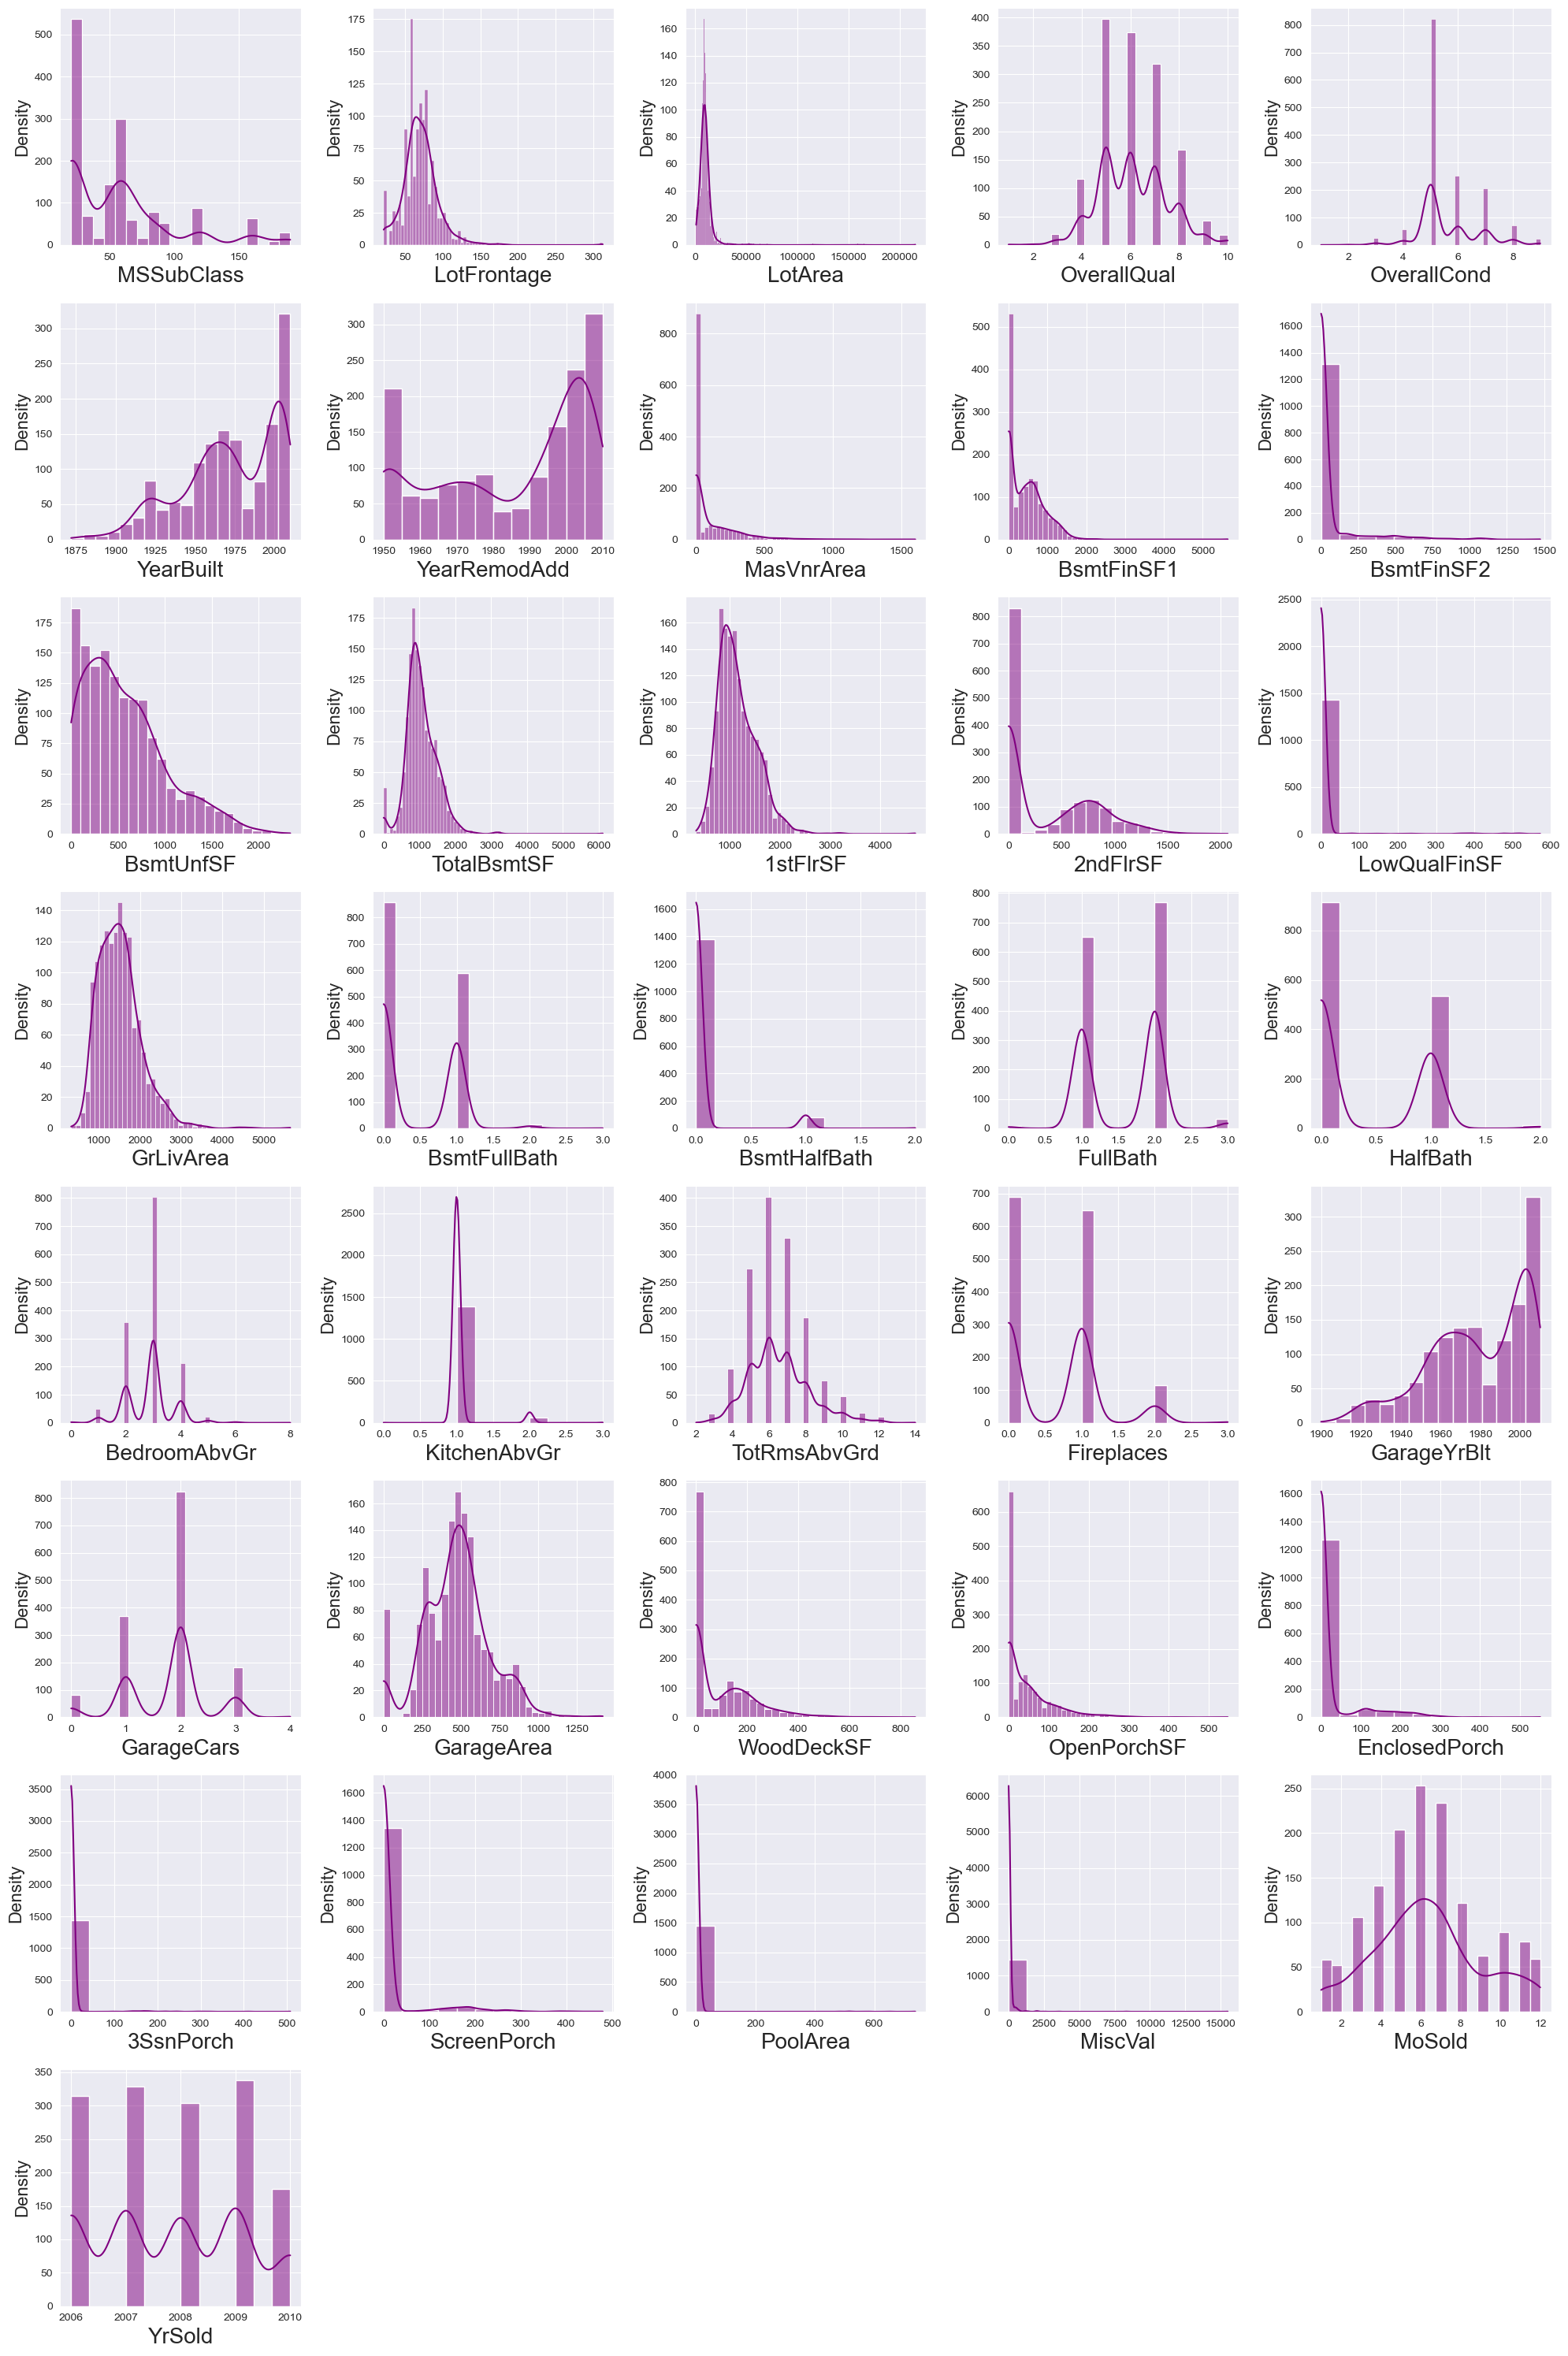

In [19]:
plt.figure(figsize=(20,30))
sns.set_style('darkgrid')
plot=1

for col in num_var:
     if plot<=37:
        plt.subplot(8,5,plot)
        sns.histplot(data,x=col,kde=True,color='purple')
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Density',fontsize=16)
        plot+=1
        plt.tight_layout()


# Insights

- The MSSubClass variable distribution is highly skewed.
- The majority of the values are concentrated around subclasses 20-60.
- LotFrontage has a right-skewed distribution.
- Most properties have a lot frontage between 50 and 100 feet, with a peak around 60 feet.
- LotArea also exhibits a right-skewed distribution.
- The majority of the properties have a lot area between 0 and 20,000 square feet.
- OverallQual is approximately normally distributed.
- The distribution is centered around an overall quality rating of 5-7, showing that most properties are of average to above-average quality.
- Most properties are in average condition, with fewer properties in poor or excellent condition.
- There has been a significant increase in property construction, reflecting growth in the housing market.
- Masonry veneer is not common among the properties.
- There is a noticeable seasonal trend in property sales, peaking during the summer months, especially in the first three quarters.
- Many properties have limited or unfinished basement space.
- Property sales are distributed across the years from 2006 to 2010, with each year showing a similar number of sales.
- Only 2009 appears to have slightly fewer sales compared to other years.


# Visualising Categorical columns

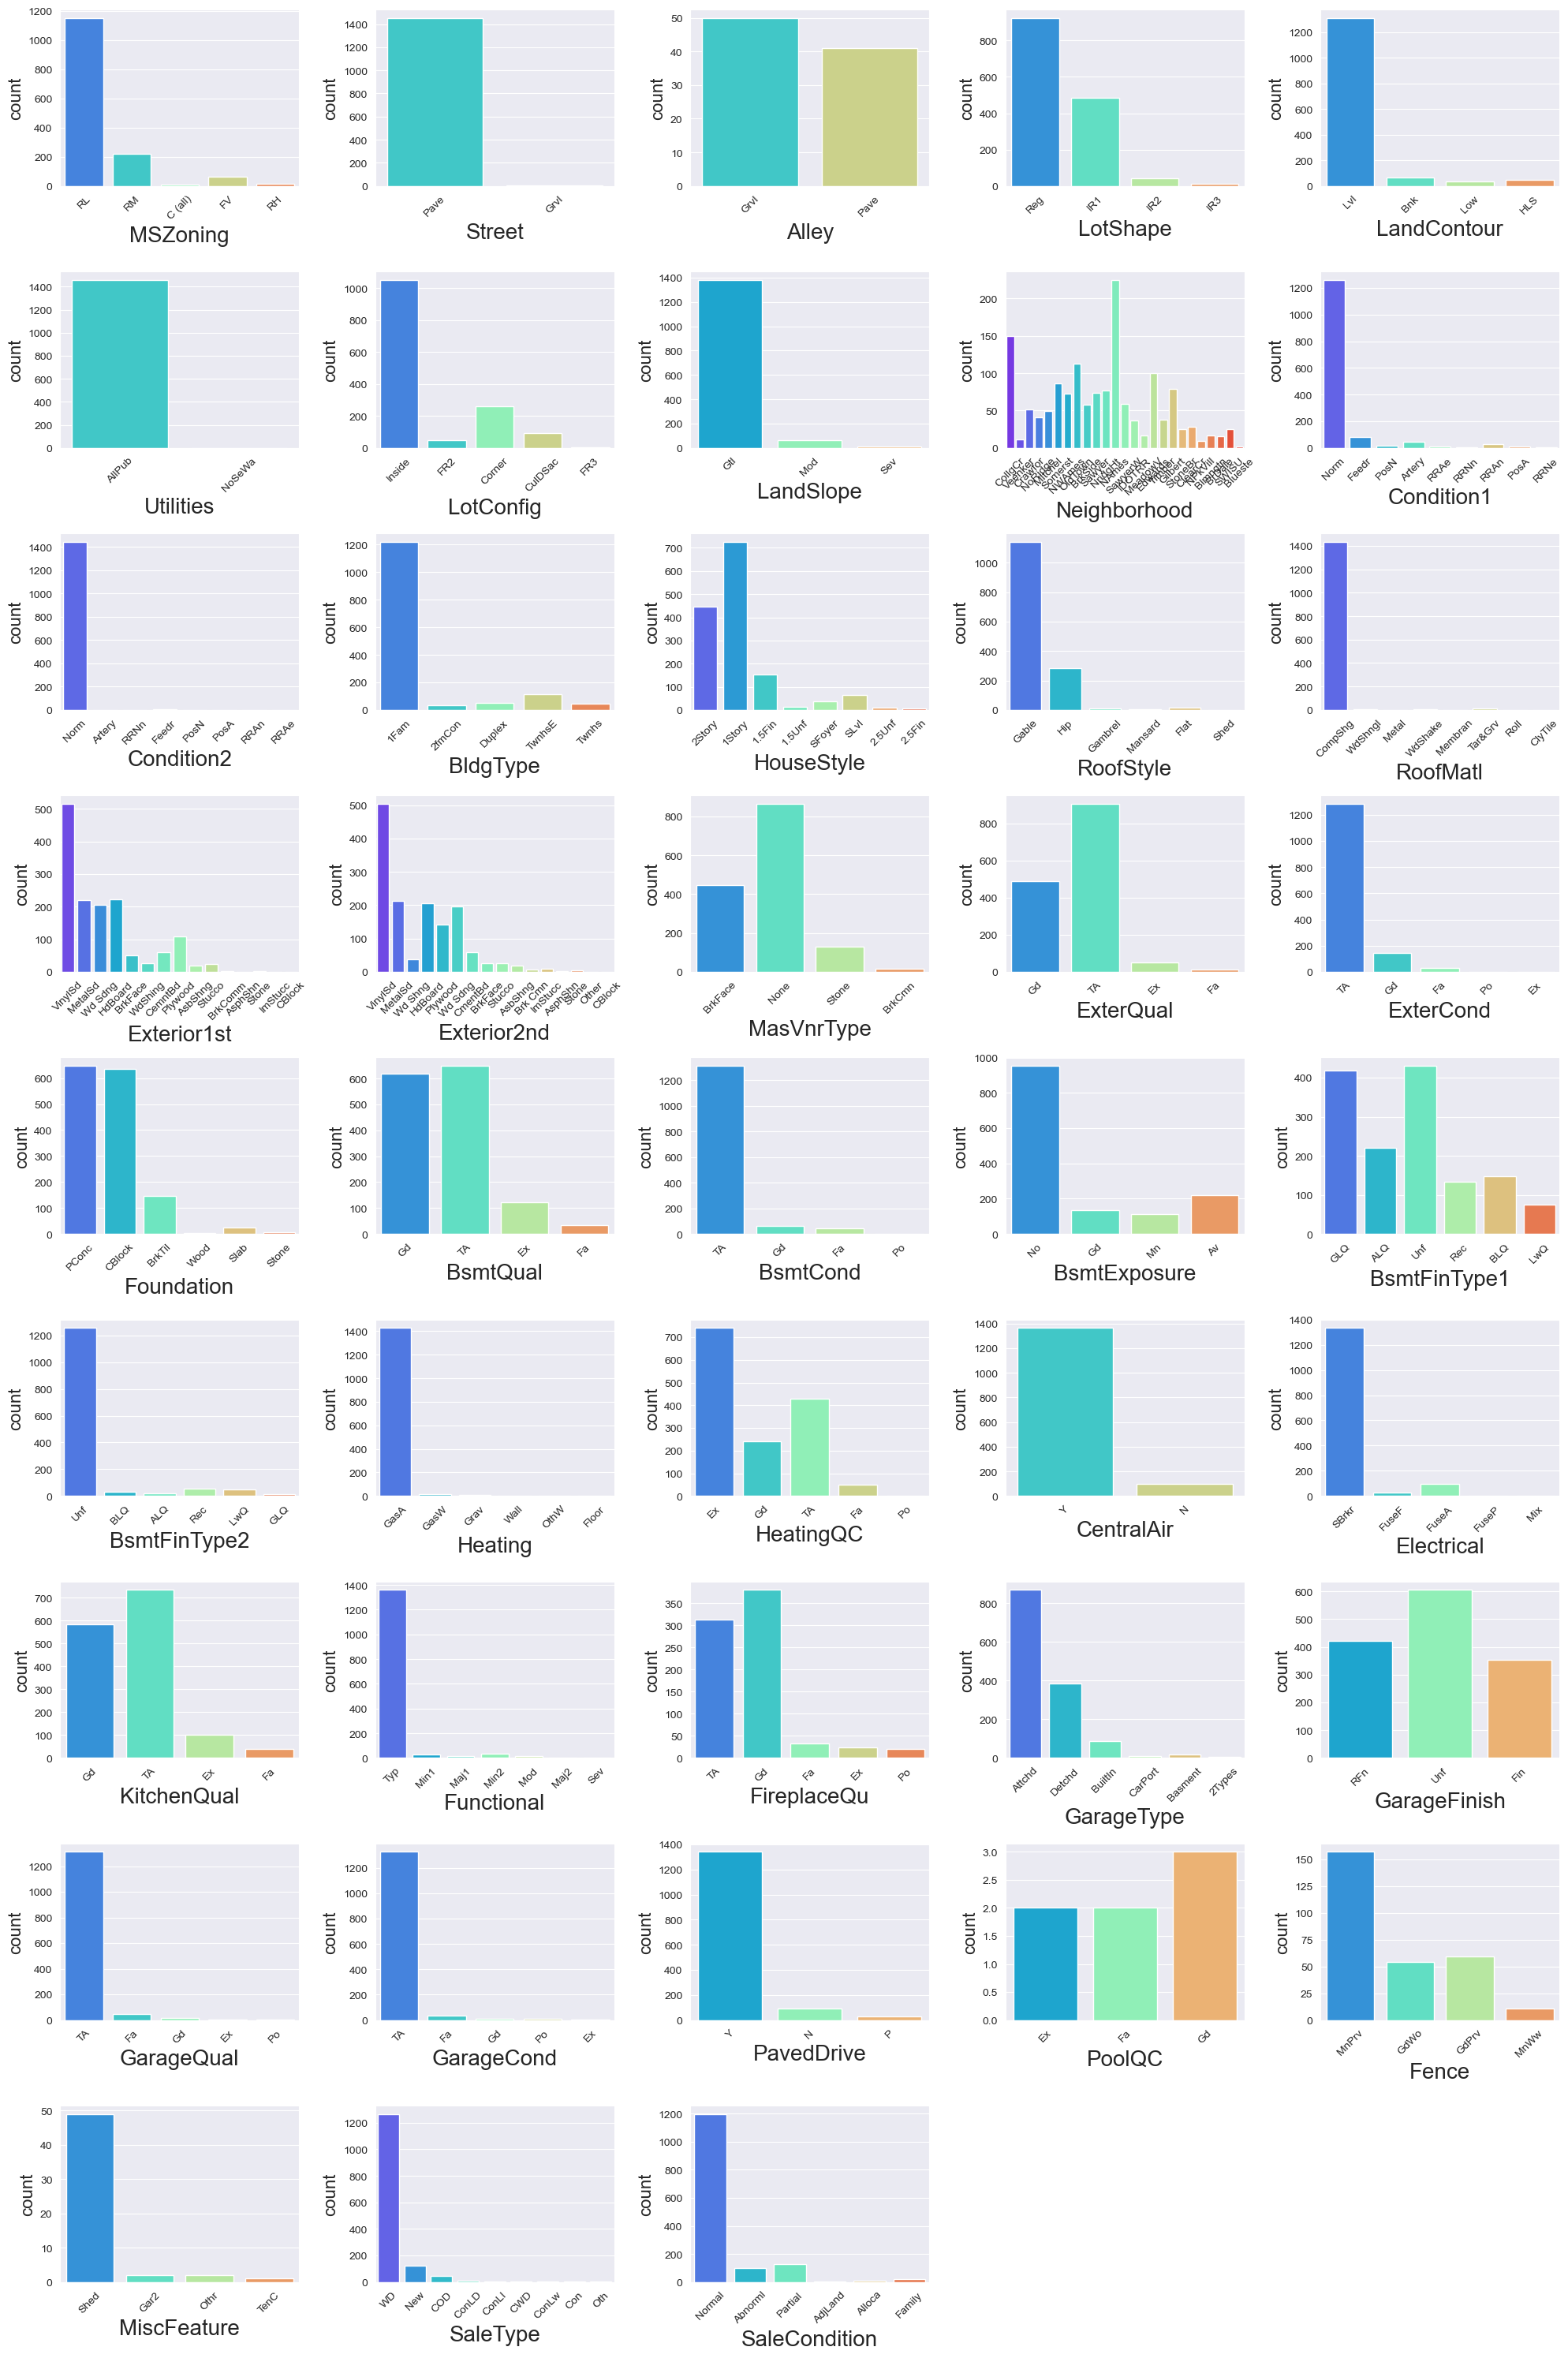

In [20]:
plt.figure(figsize=(20,30))
sns.set_style('darkgrid')
plot = 1

for col in cat_var:
    if plot <= 43:
        plt.subplot(9, 5, plot)
        sns.countplot(data, x=col, palette='rainbow')
        plt.xlabel(col, fontsize=20)
        plt.xticks(rotation=45, fontsize=10)
        plt.ylabel('count', fontsize=16)
        plot += 1
plt.tight_layout()


# Insights
- More than 90% of the houses are situated on paved streets.
- 925 out of 1460 properties have a regular lot shape, indicating a preference for this lot shape.
- 1311 out of 1460 properties have a level (Lvl) land contour, suggesting that level lots are highly preferred.
- There is a strong preference for inside lots, which are typically more sheltered from traffic noise.
- Most houses are single-family detached ('1Fam'), with duplexes and other building types being significantly less common.
- The '1Story' style is the most prevalent, followed by '2Story' and '1.5Fin'.
- Other styles are much less common.
- The vast majority of houses use 'CompShg' (composite shingles) for roofing material.
- 'VinylSd' (vinyl siding) is the most common exterior covering, with 'HdBoard' (hardboard) and 'MetalSd' (metal siding) also being fairly common.
- 'PConc' (poured concrete) and 'CBlock' (concrete block) are the most common foundation types.
- Most houses have 'No' basement exposure.
- 'GLQ' (good living quarters) and 'Unf' (unfinished) are the most common basement finish types.
- The most common heating quality is 'Ex' (excellent), followed by 'TA'.
- The vast majority of houses have central air conditioning ('Y').
- Almost all houses have a paved driveway ('Y').


# Bivariate Analysis

## Plot for categorical variables

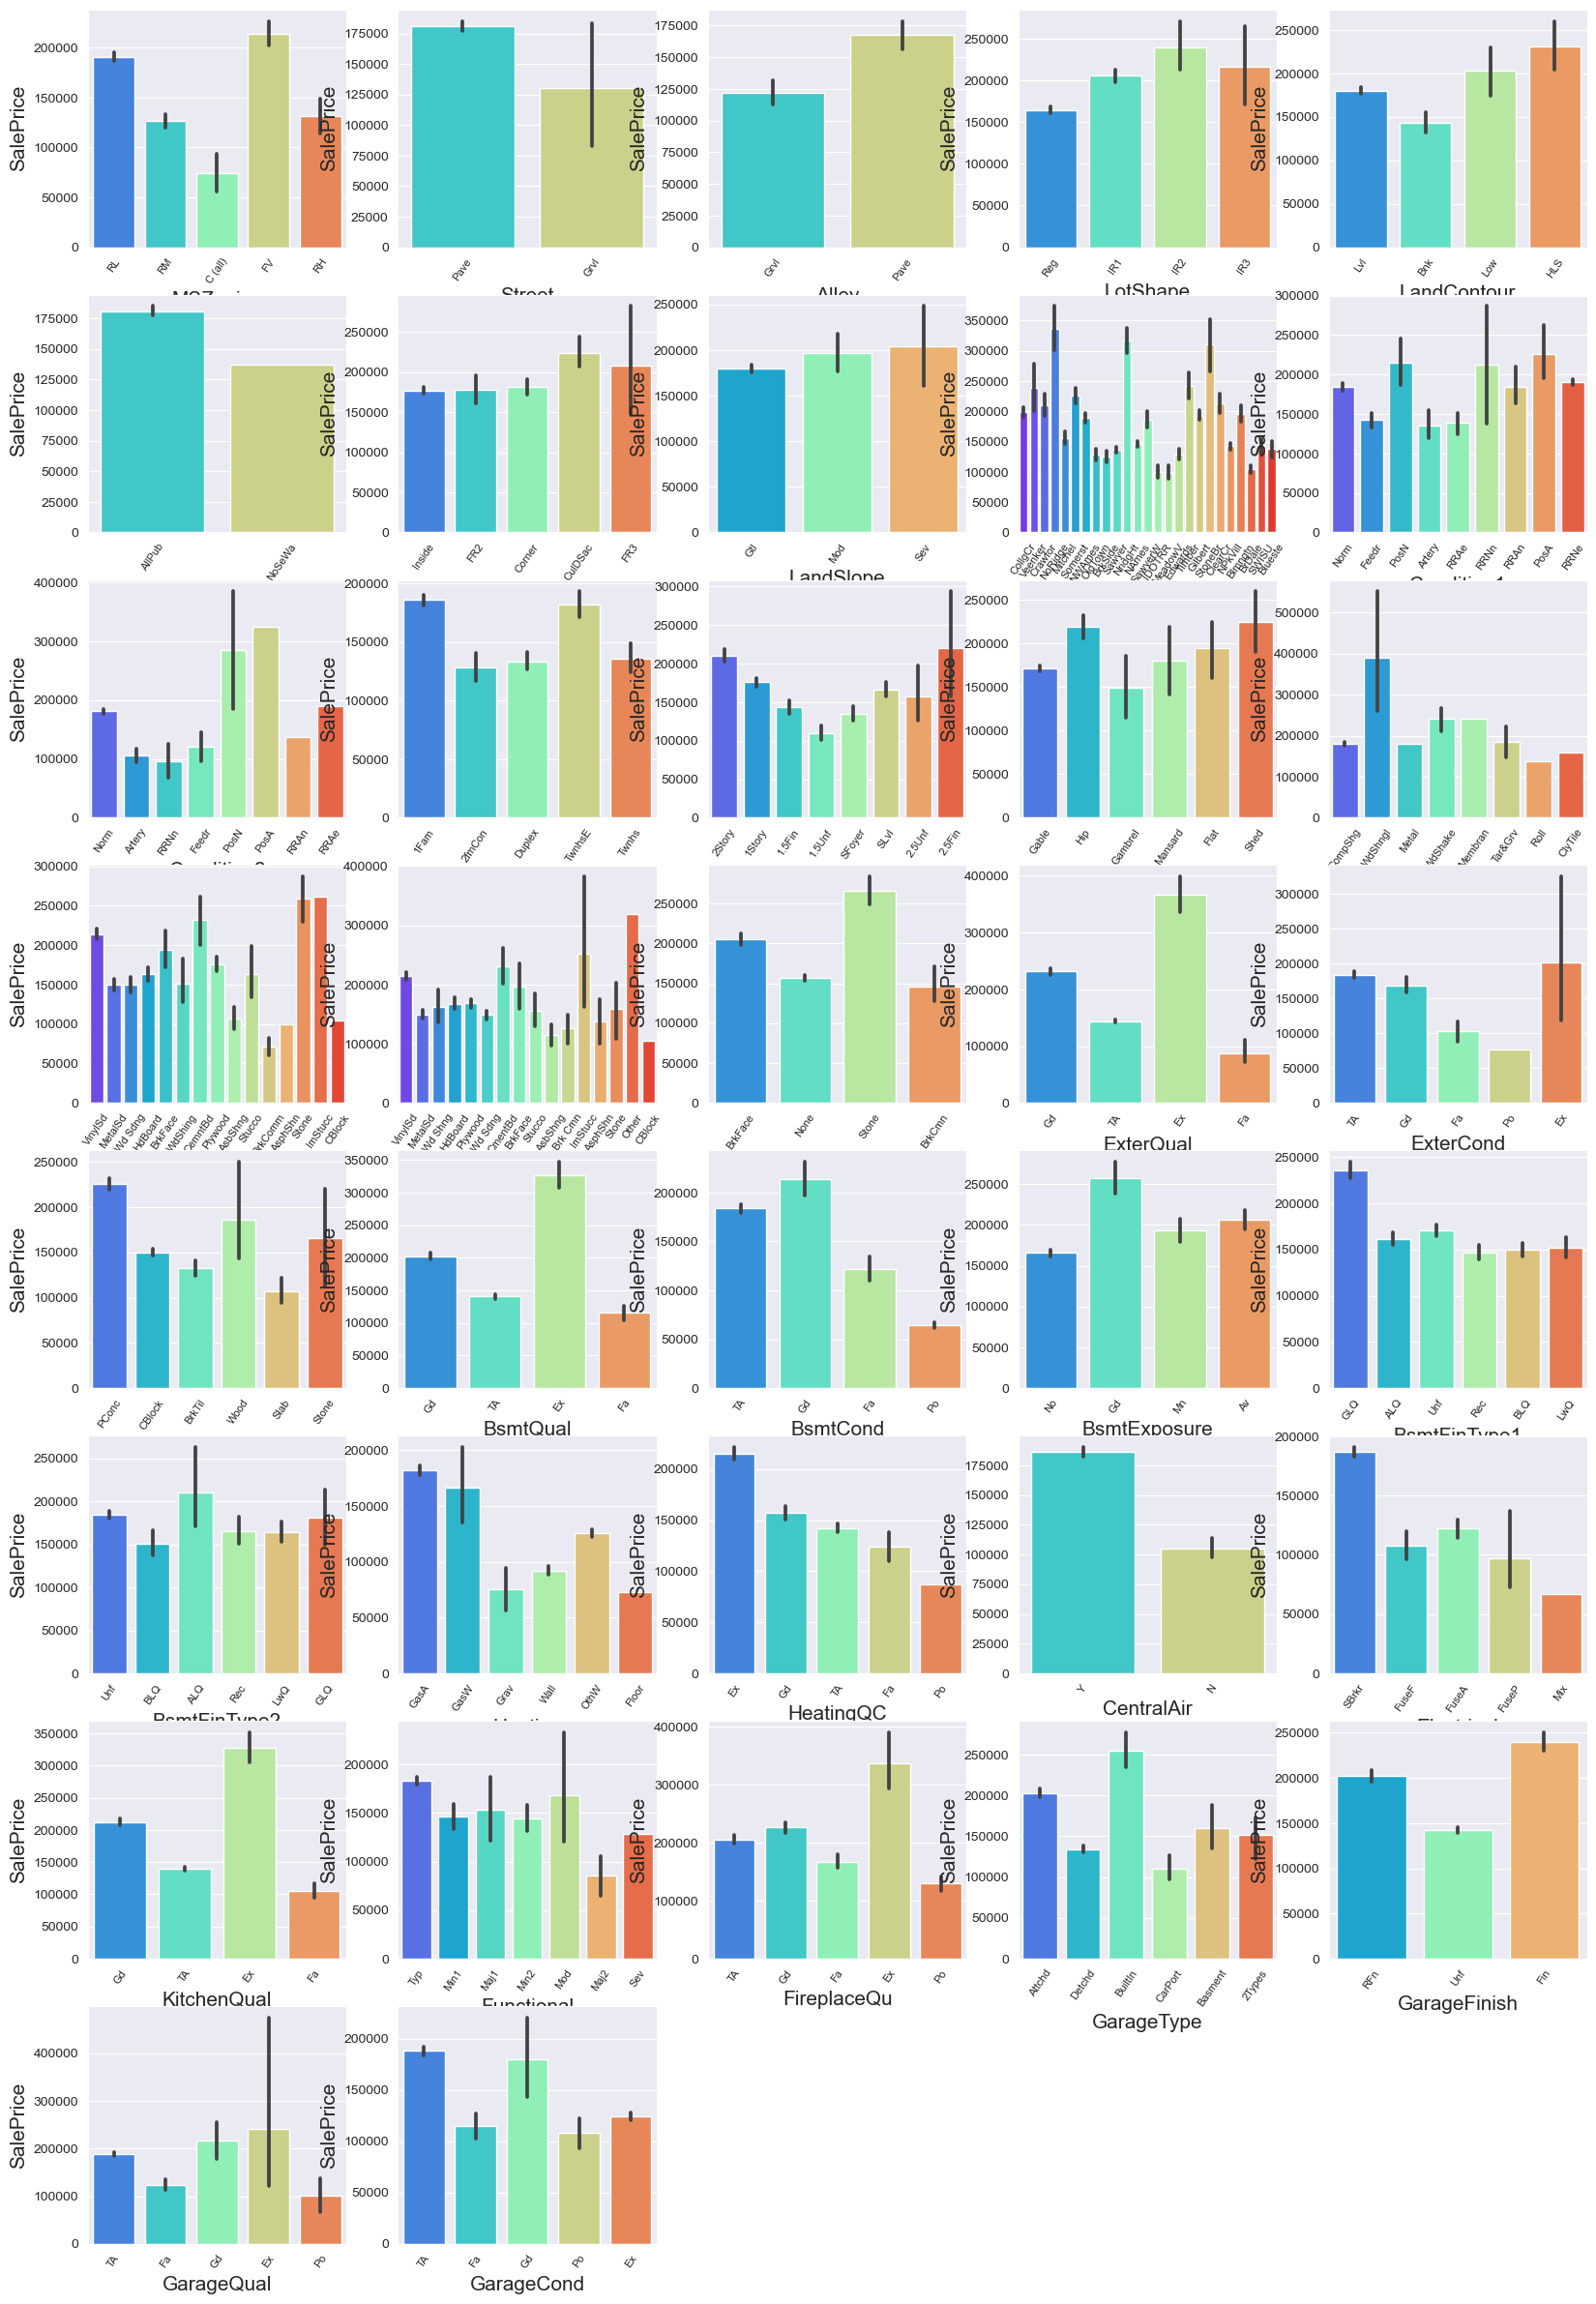

In [21]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_style('darkgrid')

plot_no=1

for column in cat_var:
     if plot_no<=37:
        plt.subplot(8,5,plot_no)
        sns.barplot(data,y='SalePrice',x=column,palette='rainbow')
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=55,fontsize=8)
        plt.ylabel('SalePrice',fontsize=15)
 
     plot_no+=1


Insights
 - Houses in the 'FV' (floating village residential) zone have the highest average sale prices, followed by 'RL'
 - Houses with 'Reg' (regular) lot shapes have higher average sale prices compared to those with irregular shapes ('IR1', 'IR2', 'IR3').
 - Houses on 'HLS' (hillside) land contours have the highest average sale prices, followed by 'Lvl' (level) contours. 'Bnk' (banked) and 'Low' (low lying) contours have lower average sale prices.
 - There is a wide variation in average sale prices across different neighborhoods.
 - Houses on 'Gtl' (gentle slope) land have higher average sale prices compared to those on 'Mod' (moderate slope) and 'Sev' (severe slope) land.
 - Houses with 'Ex' (excellent) fireplace quality have significantly higher average sale prices compared to other categories

# Plot for numerical variables

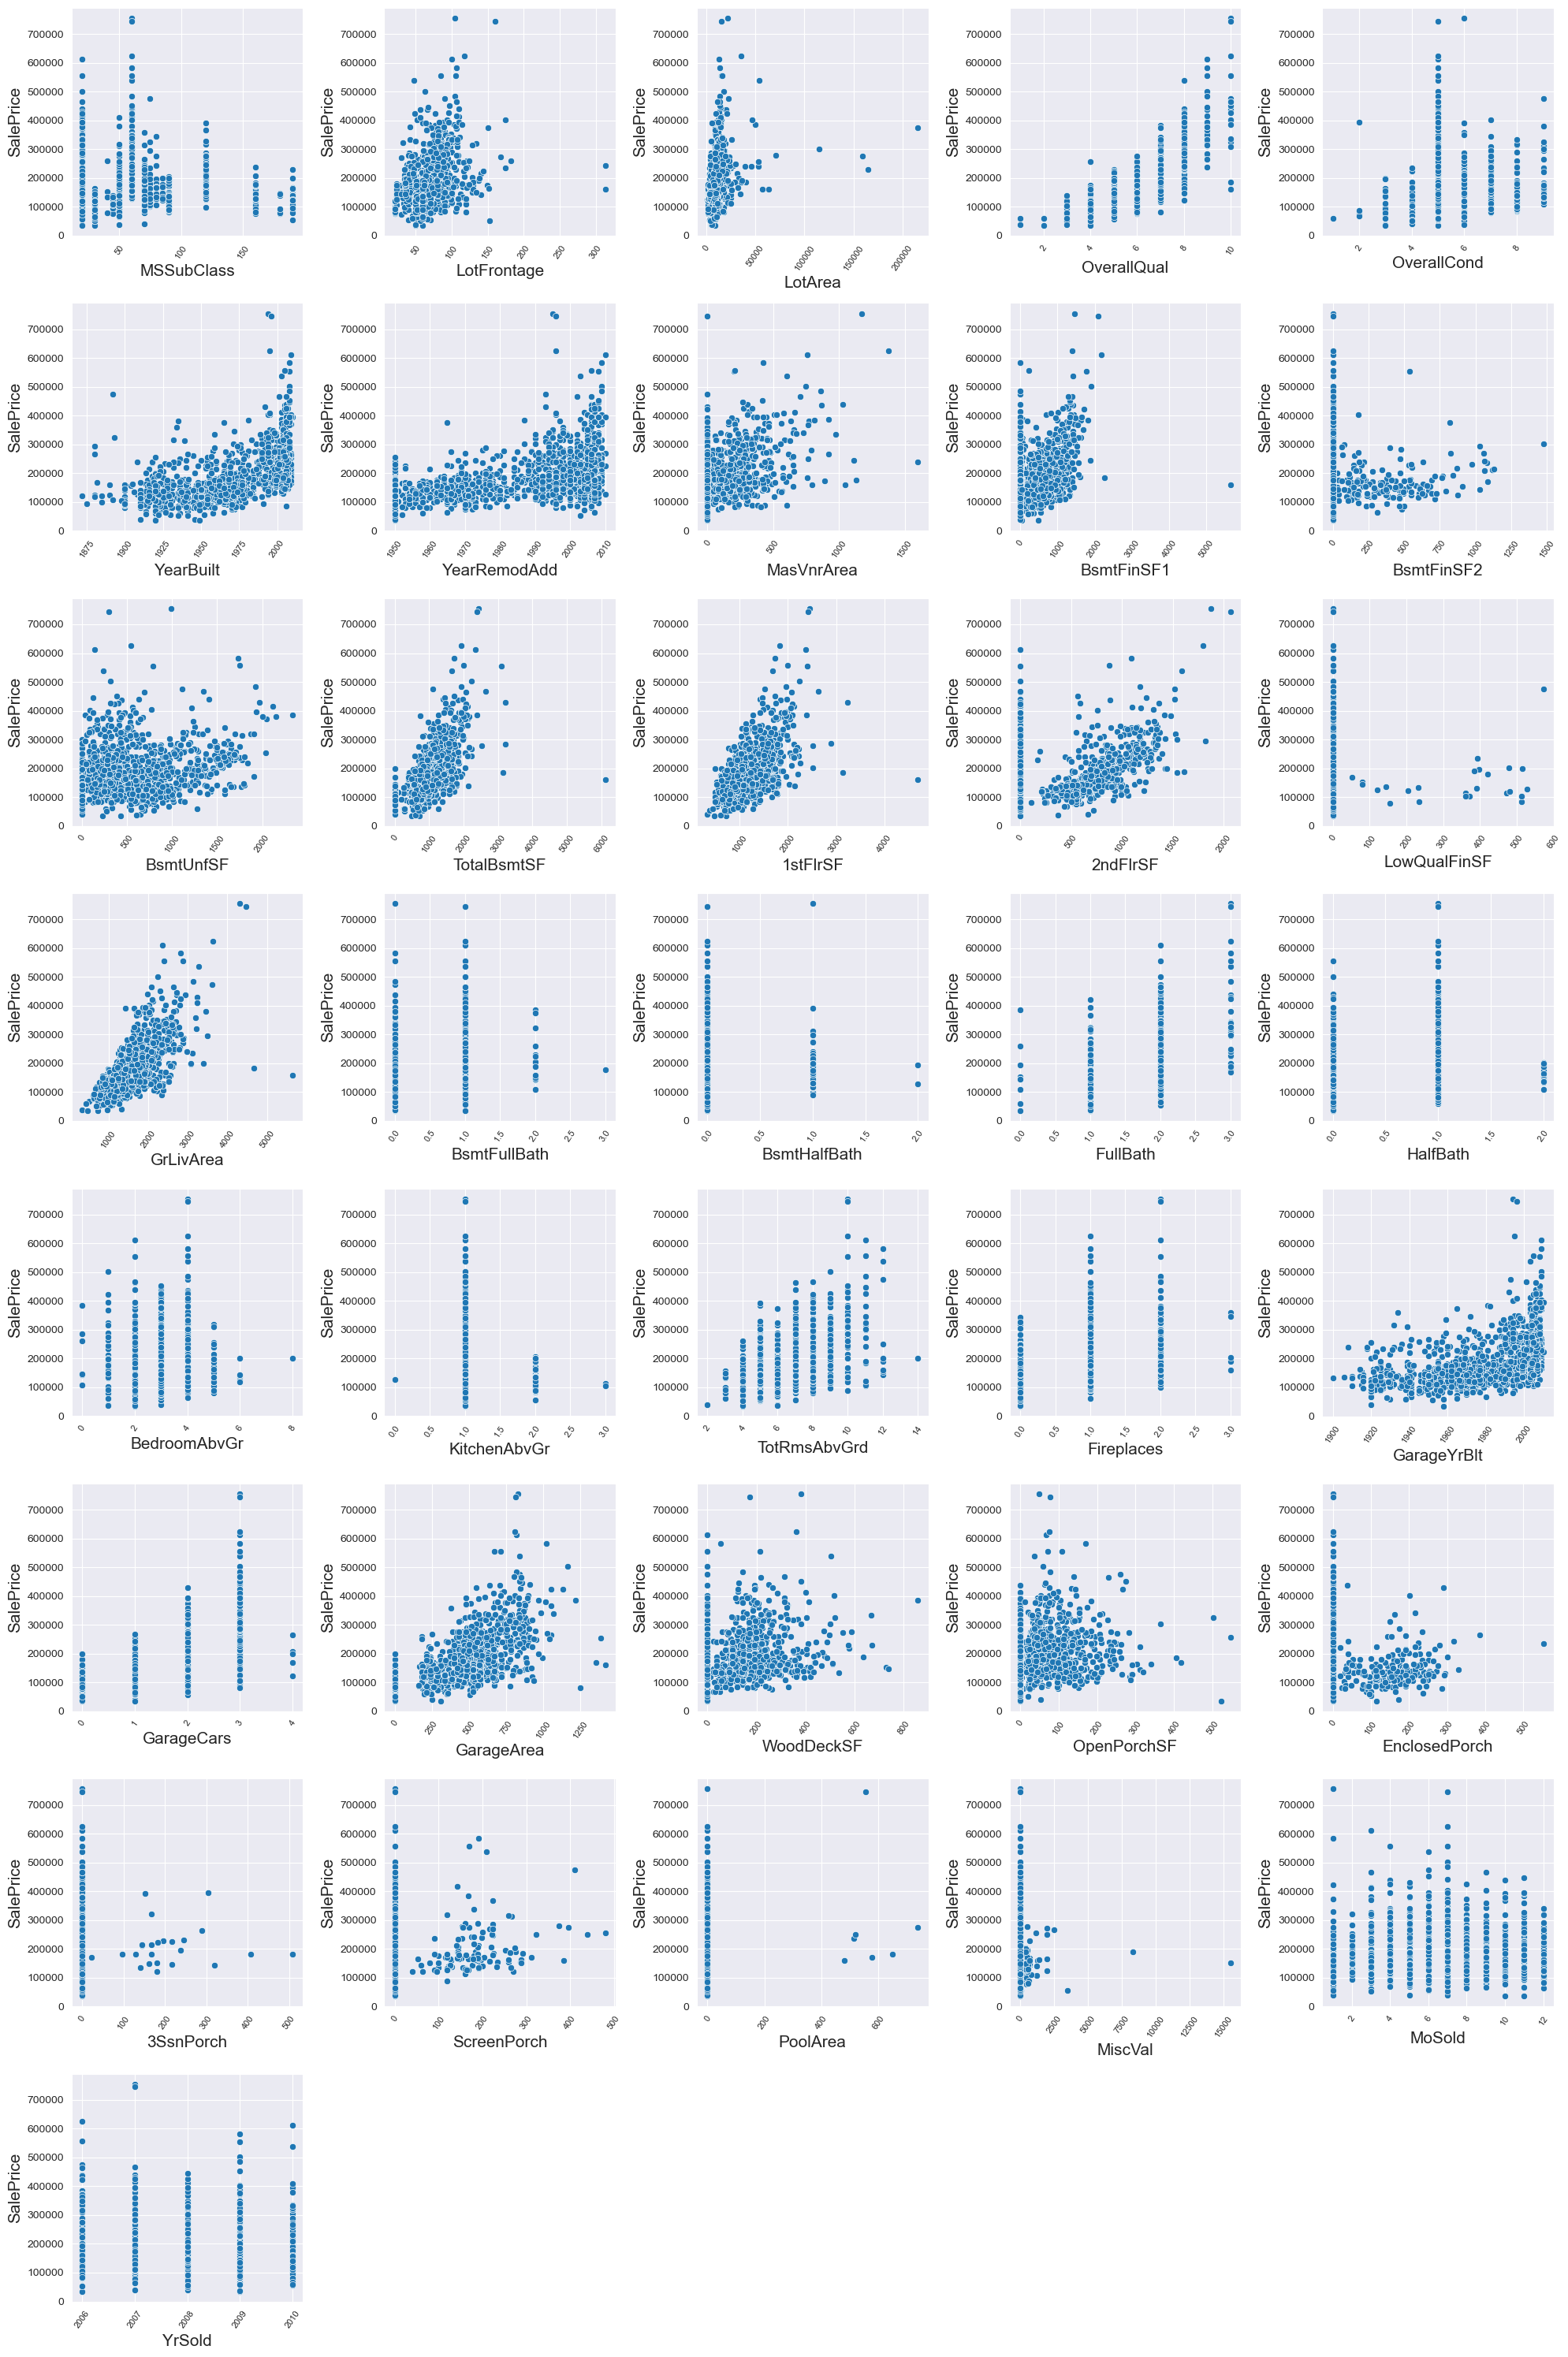

In [22]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_style('darkgrid')

plot_no=1

for column in num_var:
     if plot_no<=40:
        plt.subplot(8,5,plot_no)
        sns.scatterplot(data,y='SalePrice',x=column)
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=55,fontsize=8)
        plt.ylabel('SalePrice',fontsize=15)
        plot_no+=1
plt.tight_layout()


# Insights
 - SalePrice significantly doesn't depend on LotArea.Houses with lot areas in the range of 0-50,000 square feet have the highest maximum sale prices.
 - SalePrice of houses increase with the increase in OverallQual.

# Preprocessing

## Checking null values / null percentage

In [23]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [24]:
null_val=data.isnull().sum()[data.isnull().sum()>0]
null_percent=null_val*100/1460
print(null_val,'\n',null_percent)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64 
 LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


# Insights
 - Handling
MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Ele
 - GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond since the missing values are below the threshold(20% of 1460)
 - Dropping PoolQC,Fence,MiscFeature,FirePlaceQu,MasVnrType,Alley since the missing values are above the required threshold.

In [25]:
null_val

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [26]:
# Creating a variable for storing input features having missing values above
null_col=null_val[null_val> 0.2*1460].index.tolist()
print(null_col)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


# Treating null values/columns


In [27]:
# dropping null columns

data.drop(null_col,axis=1,inplace=True)

In [28]:
# numerical input features
num_var=data.select_dtypes(exclude=['object'])
num_var.drop(['SalePrice'],axis=1,inplace=True)

# Imputing missing values

In [29]:
data.LotFrontage.fillna(data.LotFrontage.median(),inplace=True)
data.MasVnrArea.fillna(data.MasVnrArea.median(),inplace=True)
data.BsmtCond.fillna(mode(data.BsmtCond),inplace=True)
data.BsmtExposure.fillna(mode(data.BsmtExposure),inplace=True)
data.BsmtFinType1.fillna(mode(data.BsmtFinType1),inplace=True)
data.BsmtFinType2.fillna(mode(data.BsmtFinType2),inplace=True)
data.Electrical.fillna(mode(data.Electrical),inplace=True)
data.GarageType.fillna(mode(data.GarageType),inplace=True)
data.GarageYrBlt.fillna(mode(data.GarageYrBlt),inplace=True)
data.GarageFinish.fillna(mode(data.GarageFinish),inplace=True)
data.GarageQual.fillna(mode(data.GarageQual),inplace=True)
data.GarageCond.fillna(mode(data.GarageCond),inplace=True)
data.BsmtQual.fillna(mode(data.BsmtQual),inplace=True)

In [30]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

# Checking Outliers

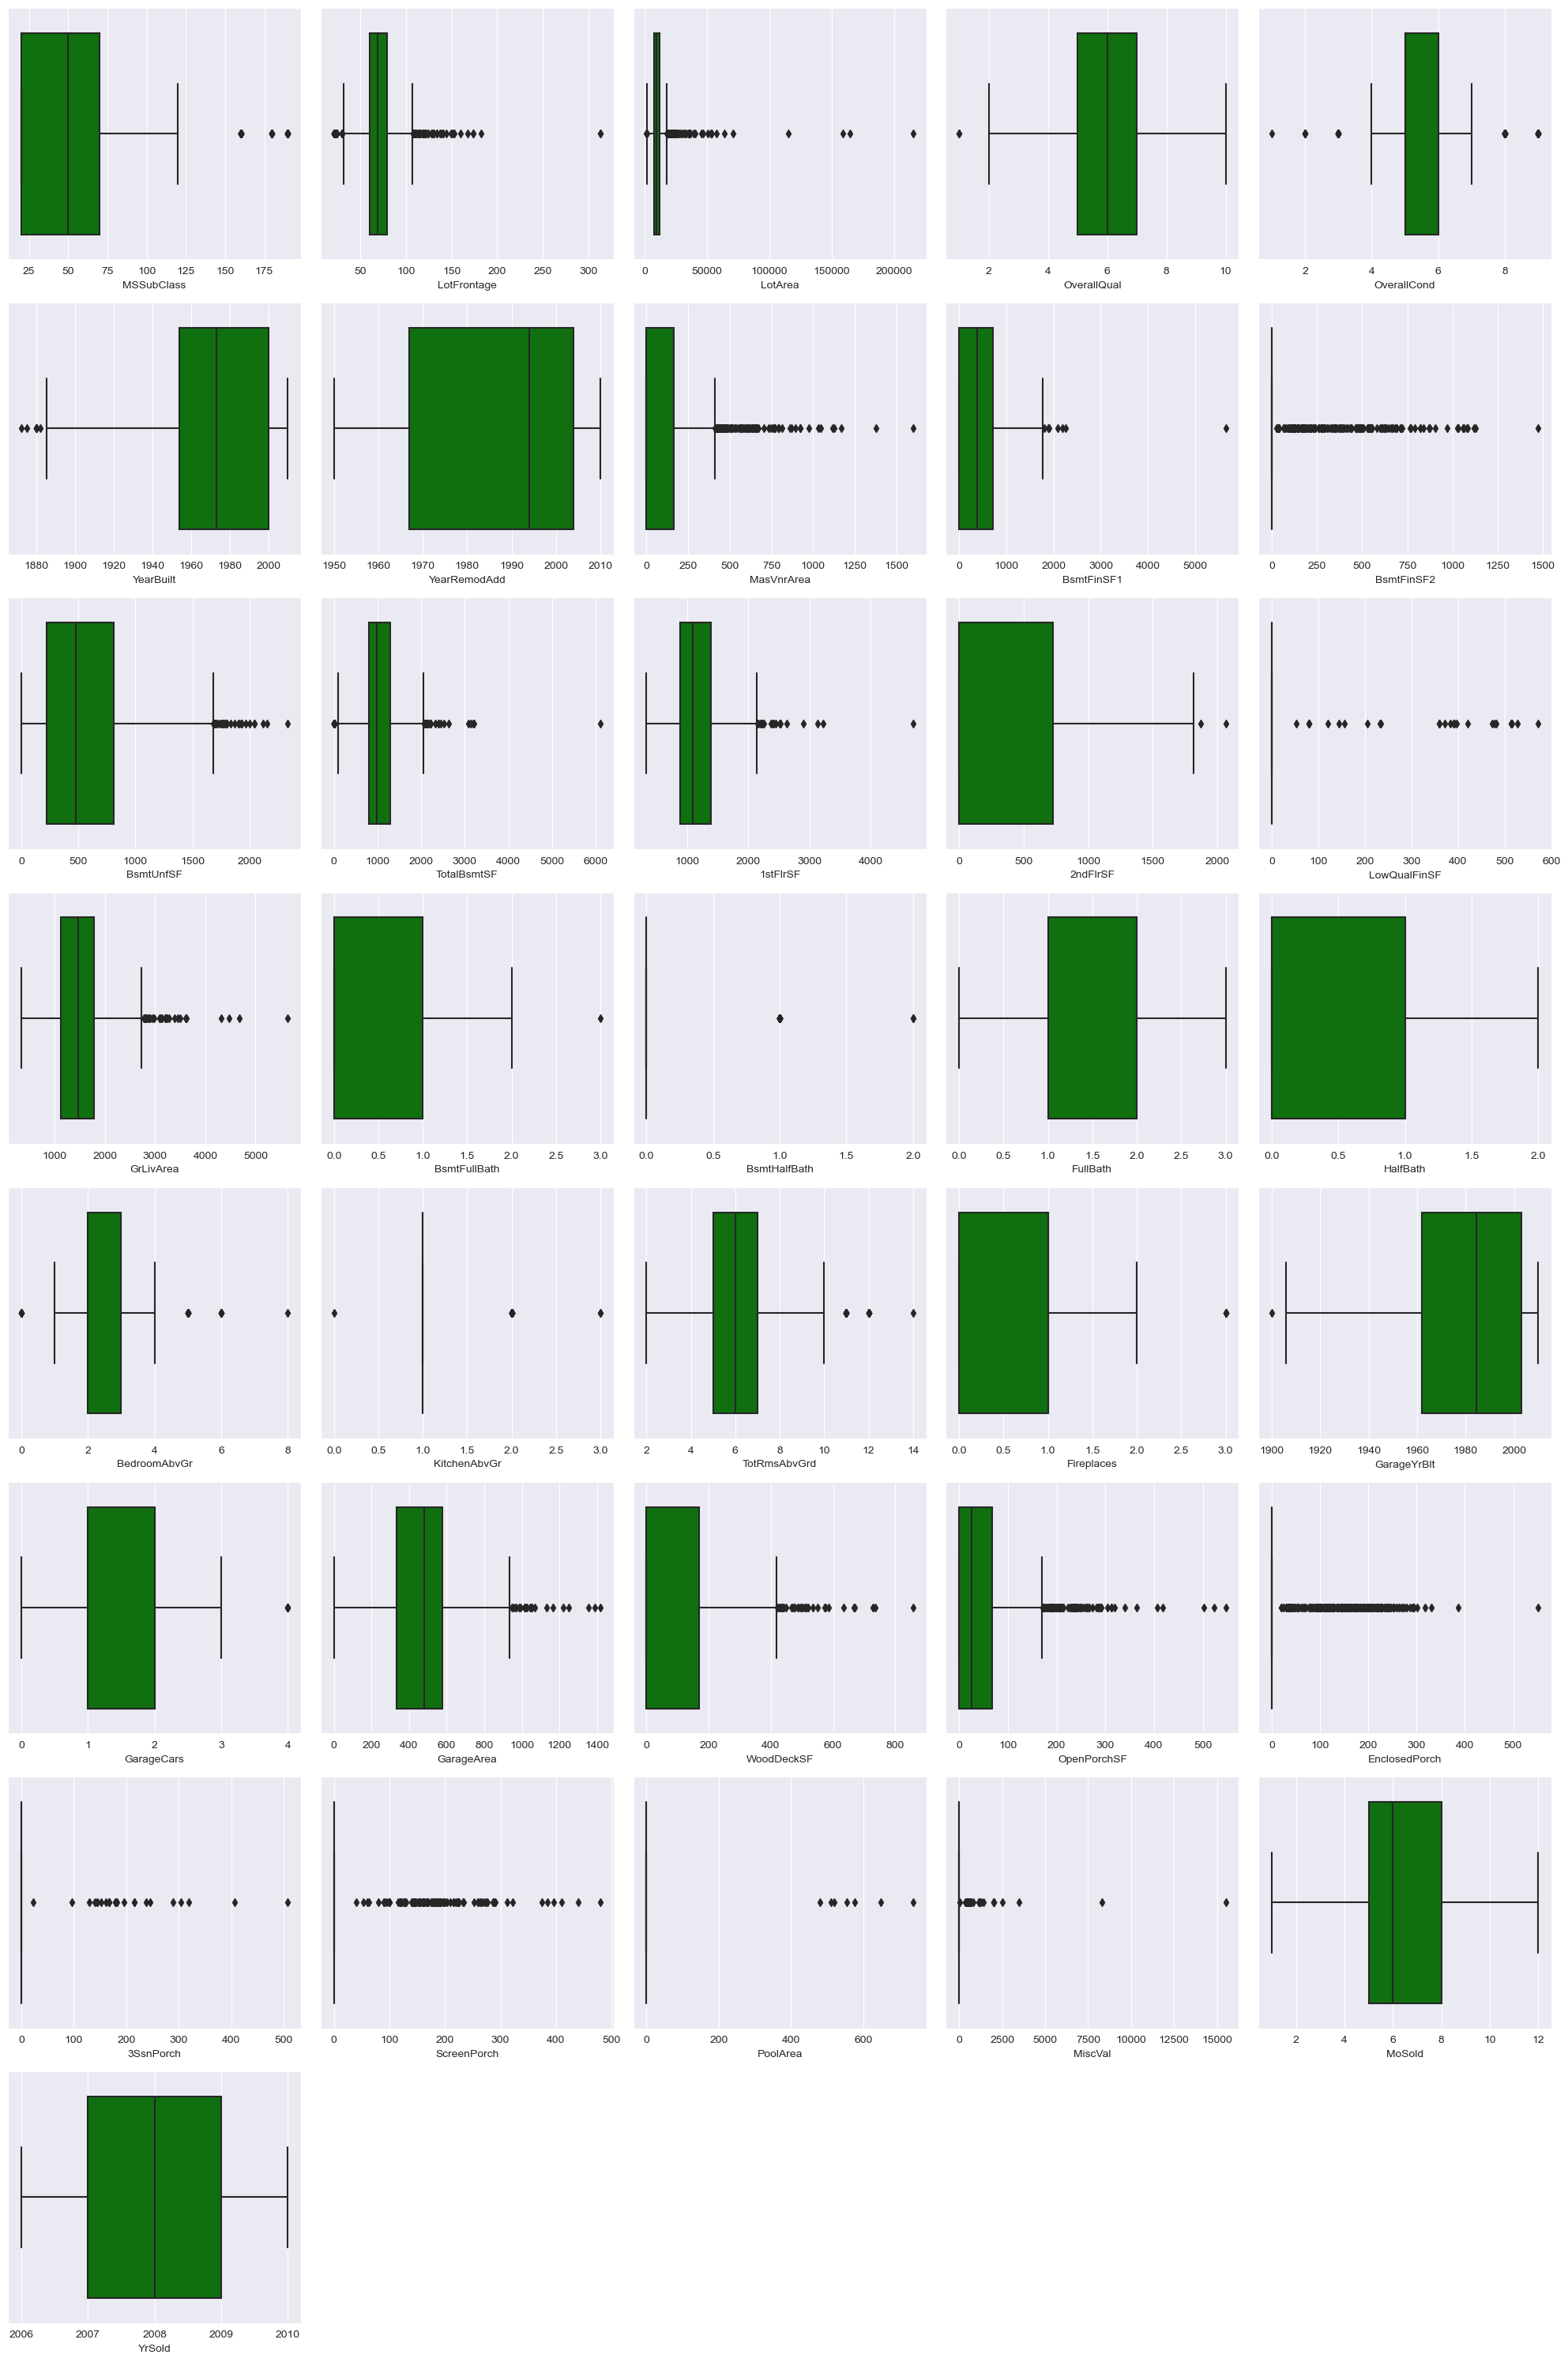

In [31]:
plt.figure(figsize=(20,30),facecolor='white')

plot_no=1
for column in num_var:
     if plot_no<=37:
        plt.subplot(8,5,plot_no)
        sns.boxplot(x=data[column],color='green')
        plot_no+=1
plt.tight_layout()


# Insights
 - MSSubClass represents different types of residential dwellings and should be treated as a categorical variable rather than a numerical one.
 - Handling outliers only for the continuous columns having outliers below 5%.
 - Scaling variable for which Outliers are above 5%.

# Handling Outliers

## IQR Method

In [32]:
#  Handling Outliers -using IQR method
Q1=num_var.quantile(0.25)
Q3=num_var.quantile(0.75)

IQR=Q3-Q1

min_range=Q1-1.5*IQR
max_range=Q3+1.5*IQR

In [33]:
#outliers

outliers_count=((num_var>max_range) | (num_var<min_range)).sum()
print(outliers_count)

#Outliers percentage
print('=============================================================')
Outlier_prctg=(outliers_count/len(num_var))*100
print(Outlier_prctg) 

MSSubClass       103
LotFrontage       88
LotArea           69
OverallQual        2
OverallCond      125
YearBuilt          7
YearRemodAdd       0
MasVnrArea        96
BsmtFinSF1         7
BsmtFinSF2       167
BsmtUnfSF         29
TotalBsmtSF       61
1stFlrSF          20
2ndFlrSF           2
LowQualFinSF      26
GrLivArea         31
BsmtFullBath       1
BsmtHalfBath      82
FullBath           0
HalfBath           0
BedroomAbvGr      35
KitchenAbvGr      68
TotRmsAbvGrd      30
Fireplaces         5
GarageYrBlt        0
GarageCars         5
GarageArea        21
WoodDeckSF        32
OpenPorchSF       77
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
MoSold             0
YrSold             0
dtype: int64
MSSubClass        7.054795
LotFrontage       6.027397
LotArea           4.726027
OverallQual       0.136986
OverallCond       8.561644
YearBuilt         0.479452
YearRemodAdd      0.000000
MasVnrArea        6.575342
BsmtFinSF1     

In [34]:
outliers_col = ['OverallCond','LotArea','LotFrontage','WoodDeckSF','OpenPorchSF','BsmtFinSF2','MiscVal','EnclosedPorch','3SsnPorch','LotFrontage','ScreenPorch']
 
for col in outliers_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    IQR = Q3 - Q1
        
    min_range = Q1 - 1.5 * IQR
    max_range = Q3 + 1.5 * IQR
    data[col] = data[col].apply(lambda x: min_range if x < min_range else (max_range if x > max_range else x))




## Handling MSSubClass - converting to categorical



# Feature Selection

In [35]:
num_var.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.240379    0.344501    0.445863    0.097117   
2ndFlrSF        0.010308      0.1400

<Axes: >

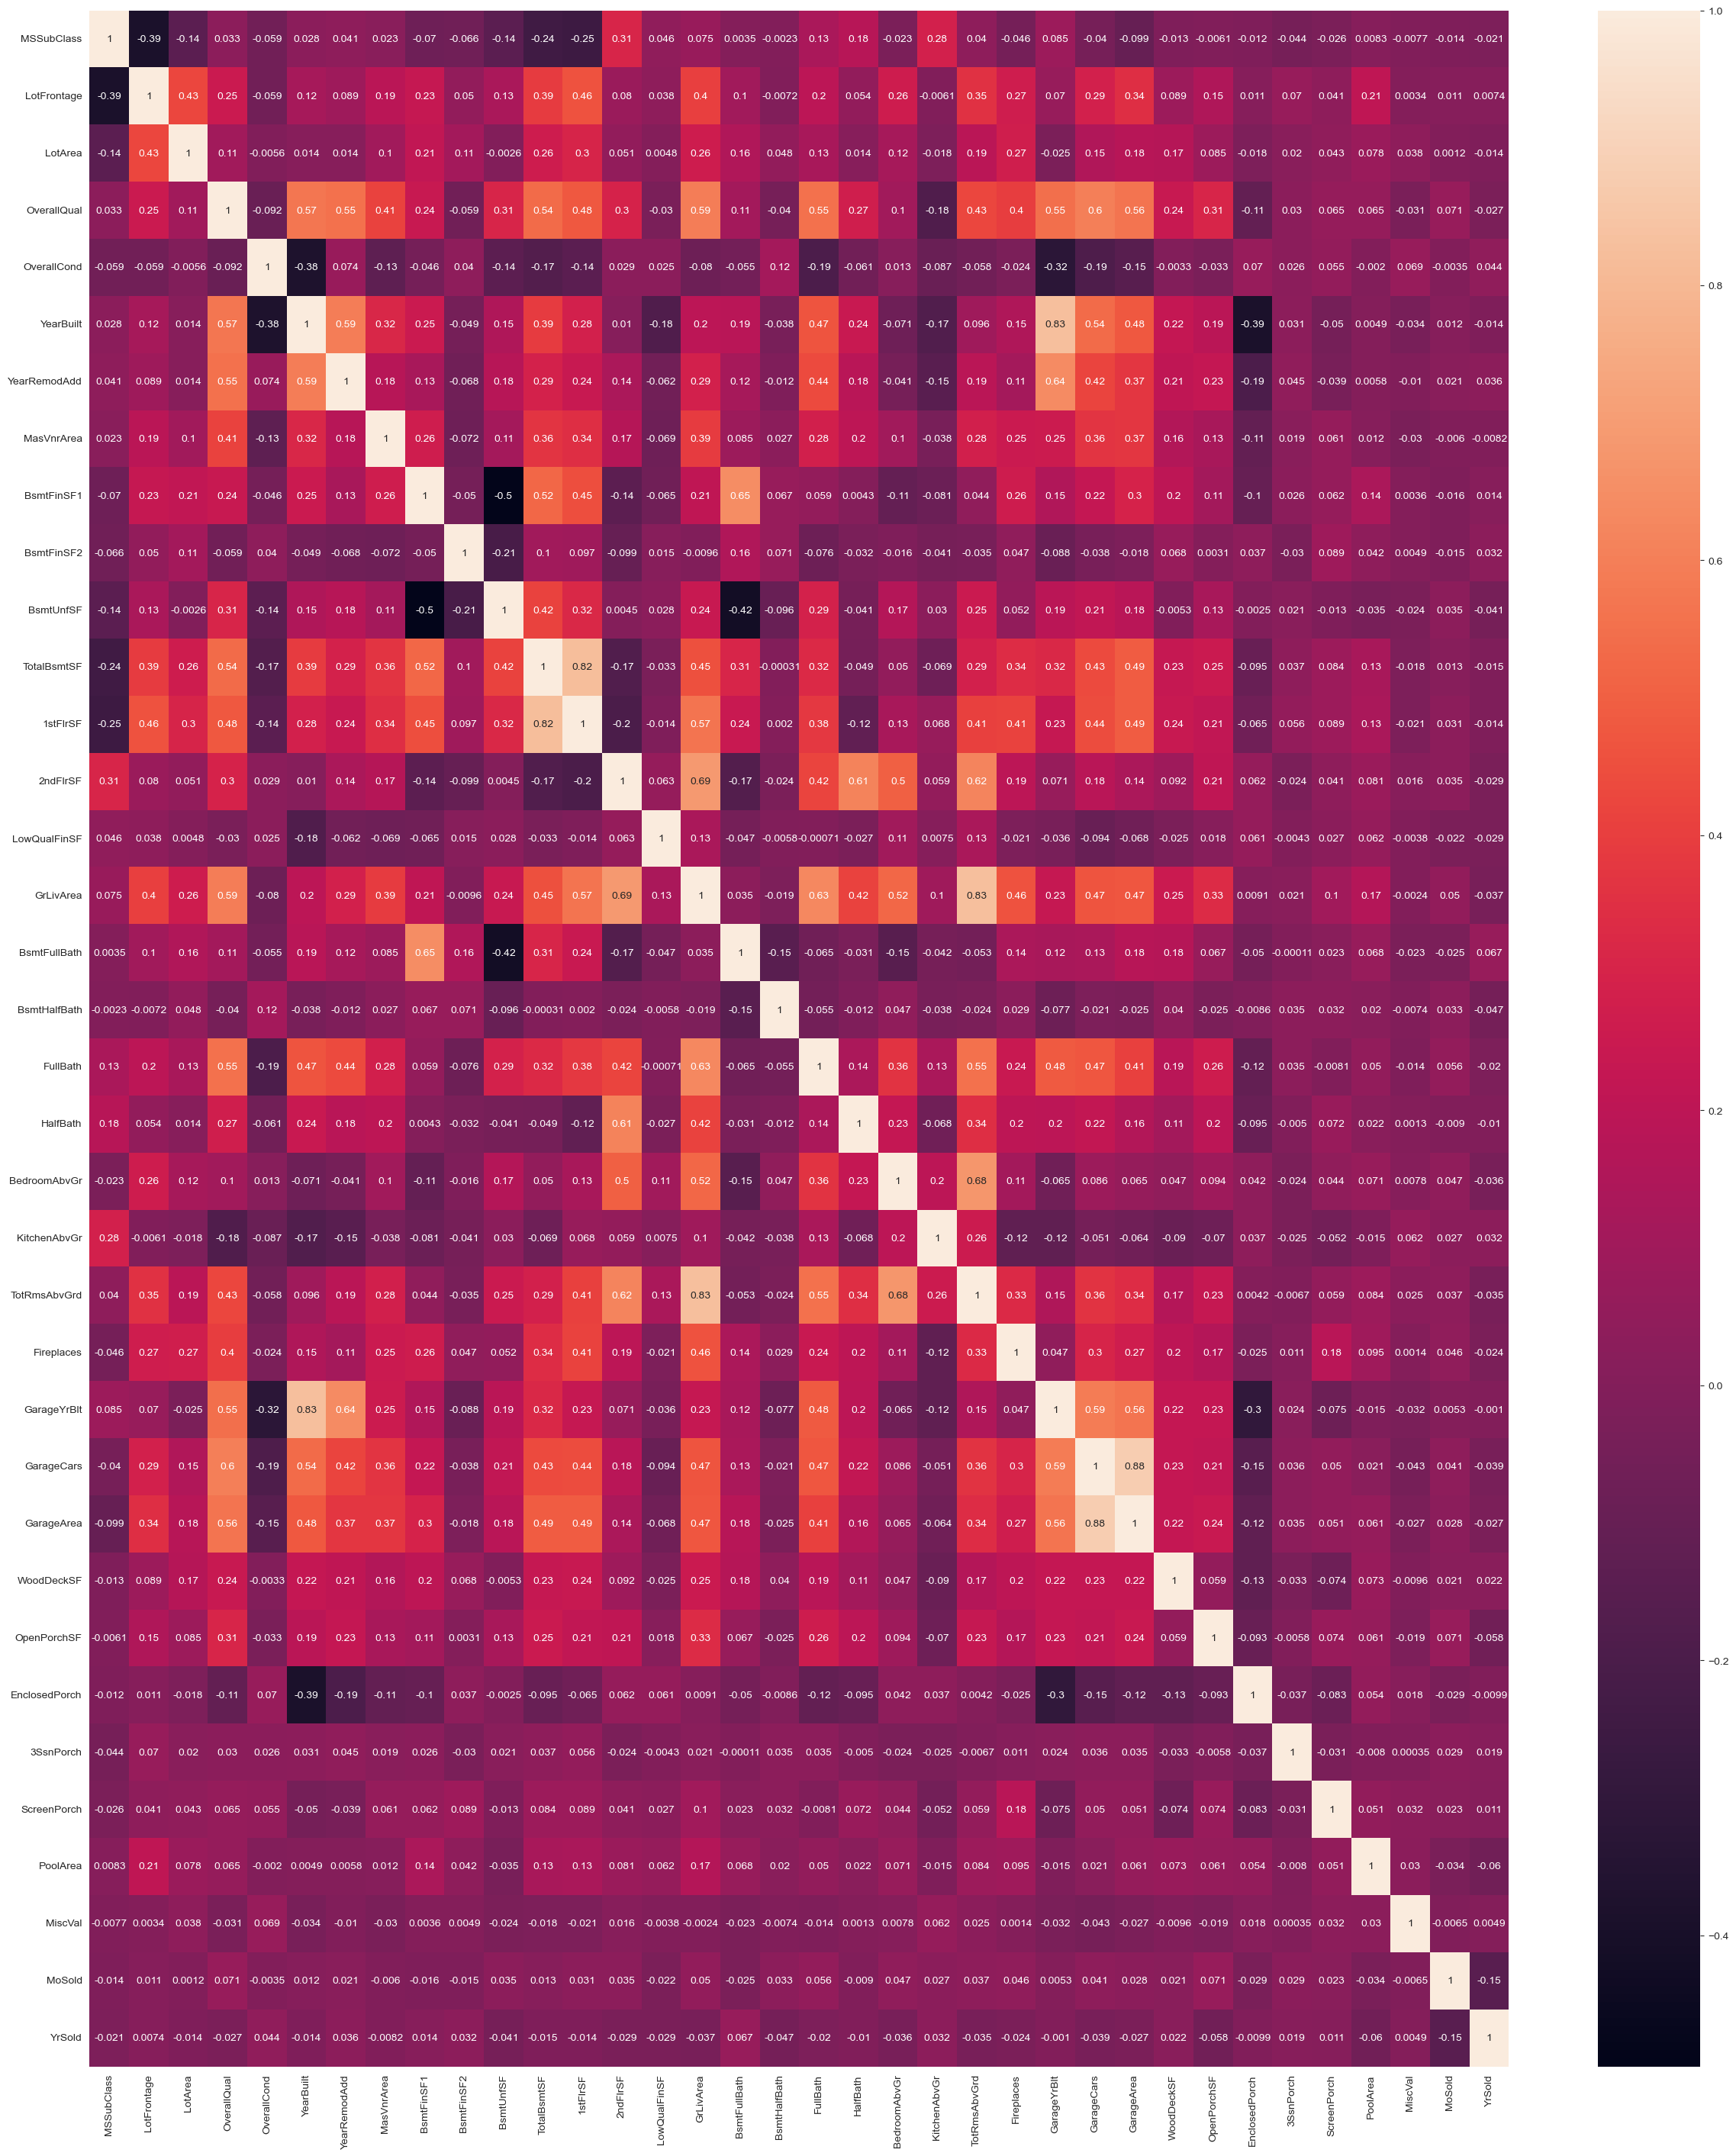

In [36]:
plt.figure(figsize=(30,35))
sns.heatmap(num_var.corr(),annot=True)


# Insights
 - High corr between GarageYrBlt and YearBuilt
 - High corr between TotRmsAbvGrd and GrLiveArea
 - High corr between 1stFlrSF and TotalBsmtSF


# Creating new features based on existing ones


In [37]:
data['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
5       Mitchel
6       Somerst
7        NWAmes
8       OldTown
9       BrkSide
10       Sawyer
11      NridgHt
12       Sawyer
13      CollgCr
14        NAmes
15      BrkSide
16        NAmes
17       Sawyer
18      SawyerW
19        NAmes
20      NridgHt
21       IDOTRR
22      CollgCr
23      MeadowV
24       Sawyer
25      NridgHt
26        NAmes
27      NridgHt
28        NAmes
29      BrkSide
30       IDOTRR
31       Sawyer
32      CollgCr
33        NAmes
34      NridgHt
35      NridgHt
36      CollgCr
37        NAmes
38        NAmes
39      Edwards
40        NAmes
41       Timber
42      SawyerW
43      CollgCr
44        NAmes
45      NridgHt
46      Mitchel
47      Somerst
48      OldTown
49       Sawyer
50      Gilbert
51      BrkSide
52       IDOTRR
53      Veenker
54        NAmes
55        NAmes
56      Somerst
57      CollgCr
58      StoneBr
59      CollgCr
60      SawyerW
61       IDOTRR
62      

In [38]:
# Assuming 'data' is your DataFrame

unique_codes = data['Neighborhood'].unique()
print(unique_codes)


['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [39]:
neighborhood_mapping = {
    'NAmes': 'Group1', 'CollgCr': 'Group1', 'OldTown': 'Group2', 'Edwards': 'Group1',
    'Somerst': 'Group1', 'Gilbert': 'Group1', 'NridgHt': 'Group1', 'Sawyer': 'Group2',
    'NWAmes': 'Group1', 'SawyerW': 'Group2', 'BrkSide': 'Group2', 'Crawfor': 'Group2',
    'Mitchel': 'Group2', 'NoRidge': 'Group1', 'Timber': 'Group1', 'IDOTRR': 'Group2',
    'ClearCr': 'Group3', 'StoneBr': 'Group3', 'SWISU': 'Group3', 'MeadowV': 'Group3',
    'Blmngtn': 'Group3', 'BrDale': 'Group2', 'Veenker': 'Group3', 'NPkVill': 'Group3', 'Blueste': 'Group3'
}

# Apply mapping to 'Neighborhood' column
data['Neighborhood'] = data['Neighborhood'].map(neighborhood_mapping)

In [40]:
#combining features to create new features based on domain knowledge

data['HouseAge']=data['YrSold']-data['YearBuilt']
data['GarageAge']=data['YrSold']-data['GarageYrBlt']
data['HouseAgeRemod']=data['YearRemodAdd']-data['YearBuilt']
data['OverallQual']=data['OverallQual']*data['OverallCond']
data['TotalBsmtSF']=data['1stFlrSF']+data['2ndFlrSF']+data['TotalBsmtSF']


In [41]:
data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','1stFlrSF','2ndFlrSF','OverallCond'],axis=1)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0   8450.0   Pave      Reg         Lvl   
1             20       RL         80.0   9600.0   Pave      Reg         Lvl   
2             60       RL         68.0  11250.0   Pave      IR1         Lvl   
3             70       RL         60.0   9550.0   Pave      IR1         Lvl   
4             60       RL         84.0  14260.0   Pave      IR1         Lvl   
5             50       RL         85.0  14115.0   Pave      IR1         Lvl   
6             20       RL         75.0  10084.0   Pave      Reg         Lvl   
7             60       RL         69.0  10382.0   Pave      IR1         Lvl   
8             50       RM         51.0   6120.0   Pave      Reg         Lvl   
9            190       RL         50.0   7420.0   Pave      Reg         Lvl   
10            20       RL         70.0  11200.0   Pave      Reg         Lvl   
11            60       RL         85.0  11924.0   Pave      IR1         Lvl   
12            20       RL         69.0  12968.0   Pave      IR2         Lvl   
13            20       RL         91.0  10652.0   Pave      IR1         Lvl   
14            20       RL         69.0  10920.0   Pave      IR1         Lvl   
15            45       RM         51.0   6120.0   Pave      Reg         Lvl   
16            20       RL         69.0  11241.0   Pave      IR1         Lvl   
17            90       RL         72.0  10791.0   Pave      Reg         Lvl   
18            20       RL         66.0  13695.0   Pave      Reg         Lvl   
19            20       RL         70.0   7560.0   Pave      Reg         Lvl   
20            60       RL        101.0  14215.0   Pave      IR1         Lvl   
21            45       RM         57.0   7449.0   Pave      Reg         Bnk   
22            20       RL         75.0   9742.0   Pave      Reg         Lvl   
23           120       RM         44.0   4224.0   Pave      Reg         Lvl   
24            20       RL         69.0   8246.0   Pave      IR1         Lvl   
25            20       RL        107.5  14230.0   Pave      Reg         Lvl   
26            20       RL         60.0   7200.0   Pave      Reg         Lvl   
27            20       RL         98.0  11478.0   Pave      Reg         Lvl   
28            20       RL         47.0  16321.0   Pave      IR1         Lvl   
29            30       RM         60.0   6324.0   Pave      IR1         Lvl   
30            70  C (all)         50.0   8500.0   Pave      Reg         Lvl   
31            20       RL         69.0   8544.0   Pave      IR1         Lvl   
32            20       RL         85.0  11049.0   Pave      Reg         Lvl   
33            20       RL         70.0  10552.0   Pave      IR1         Lvl   
34           120       RL         60.0   7313.0   Pave      Reg         Lvl   
35            60       RL        107.5  13418.0   Pave      Reg         Lvl   
36            20       RL        107.5  10859.0   Pave      Reg         Lvl   
37            20       RL         74.0   8532.0   Pave      Reg         Lvl   
38            20       RL         68.0   7922.0   Pave      Reg         Lvl   
39            90       RL         65.0   6040.0   Pave      Reg         Lvl   
40            20       RL         84.0   8658.0   Pave      Reg         Lvl   
41            20       RL        107.5  16905.0   Pave      Reg         Lvl   
42            85       RL         69.0   9180.0   Pave      IR1         Lvl   
43            20       RL         69.0   9200.0   Pave      IR1         Lvl   
44            20       RL         70.0   7945.0   Pave      Reg         Lvl   
45           120       RL         61.0   7658.0   Pave      Reg         Lvl   
46            50       RL         48.0  12822.0   Pave      IR1         Lvl   
47            20       FV         84.0  11096.0   Pave      Reg         Lvl   
48           190       RM         33.0   4456.0   Pave      Reg         Lvl   
49            20       RL         66.0   7742.0   Pave  

In [42]:
num_var=data.select_dtypes(exclude=['object'])

In [43]:
cat_var=data.select_dtypes(include=['object'])

# Encoding

In [44]:
L=LabelEncoder()

In [45]:
for x in cat_var.columns:
     data[x]=L.fit_transform(data[x])

# Splitting the data

In [46]:
X=data.drop(['SalePrice'],axis=1)
y=data.SalePrice

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Scaling

In [47]:
S=StandardScaler()

In [48]:
x_train[x_train.columns.tolist()] = S.fit_transform(x_train[x_train.columns.tolist()])

# Transform the test data using the already fitted scaler
x_test[x_test.columns.tolist()] = S.transform(x_test[x_test.columns.tolist()])

# Model Training

### Linear Regression

In [49]:
# x_train

In [50]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred_lr=LR.predict(x_test)

### Model Evaluation

In [52]:
r2_score_lr = r2_score(y_test,y_pred_lr)
r2_score_lr

0.8531166462330966

In [53]:
y_lr=mean_absolute_error(y_test,y_pred_lr)
y_lr

21748.82524905287

## Lasso Regularization

In [54]:
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [55]:
y_pred_lasso=lasso.predict(x_test)

### Model Evaluation

In [56]:
r2_score_Lor = r2_score(y_test,y_pred_lasso)
r2_score_Lor

0.8530898401333351

In [57]:
y_lasso=mean_absolute_error(y_test,y_pred_lasso)
y_lasso


21747.699482451462

### SVR

In [58]:
svm=SVR(kernel='linear',C=150)
svm.fit(x_train,y_train)

SVR(C=150, kernel='linear')

In [59]:
y_pred_svm=svm.predict(x_test)

### Model Evaluation

In [60]:
r2_score_svr = r2_score(y_test,y_pred_svm)
r2_score_svr

0.8523836734830007

In [61]:
y_svm=mean_absolute_error(y_test,y_pred_svm)
y_svm

19382.093415538602

### Decision Tree

In [62]:
dt=DecisionTreeRegressor(random_state=42,max_depth=5,)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [63]:
y_pred_dt=dt.predict(x_test)

### Model Evaluation

In [64]:
r2_score_dt = r2_score(y_test,y_pred_dt)
r2_score_dt

0.8397749259374938

In [65]:
y_dt=mean_absolute_error(y_test,y_pred_dt)
y_dt

23457.323133513364

### Random Forest Regressor

In [66]:
RM=RandomForestRegressor(random_state=42)
RM.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [67]:
y_pred_RM=RM.predict(x_test)

### Model Evaluation

In [68]:
r2_score_rf = r2_score(y_test,y_pred_RM)
r2_score_rf

0.8800299209789348

In [69]:
y_RM=mean_absolute_error(y_test,y_pred_RM)
y_RM

17477.467910958905

### XG Boosting

In [70]:
XG=XGBRegressor(random_state=42,n_estimators=100)
XG.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [71]:
y_pred_XG=XG.predict(x_test)

###  Model Evaluation

In [72]:
r2_score_XG = r2_score(y_test,y_pred_XG)
r2_score_XG

0.9028308239522395

In [73]:
y_XG=mean_absolute_error(y_test,y_pred_XG)
y_XG

16762.866438356163

### LightGBM

In [74]:
LG=LGBMRegressor(random_state=42)
LG.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3235
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 67
[LightGBM] [Info] Start training from score 181441.541952


LGBMRegressor(random_state=42)

In [75]:
y_pred_LG=LG.predict(x_test)

###  Model Evaluation

In [76]:
r2_score(y_test,y_pred_LG)

0.8840978203298089

In [77]:
y_LG=mean_absolute_error(y_test,y_pred_LG)
y_LG

16593.378226273042

### Bagging

In [78]:
Bg=BaggingRegressor(random_state=42)
Bg.fit(x_train,y_train)

BaggingRegressor(random_state=42)

In [79]:
y_pred_bg=Bg.predict(x_test)

### Model Evaluation

In [80]:
r2_score_b = r2_score(y_test,y_pred_bg)

In [81]:
y_bg=mean_absolute_error(y_test,y_pred_bg)

### Gradient Boosting

In [82]:
GB=GradientBoostingRegressor(random_state=42)
GB.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [83]:
y_pred_gb=GB.predict(x_test)

### Model Evaluation

In [84]:
r2_score(y_test,y_pred_gb)

0.8972984756164211

In [85]:
y_gb=mean_absolute_error(y_test,y_pred_gb)
y_gb

16558.00580349567

# Multi Layer Perceptron

In [86]:
# Multi Layer Perceptron

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Defining parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Initialize the model
model = MLPRegressor(max_iter=100)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=20, cv=3, random_state=42, n_jobs=10)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Predicting with the best model
y_pred_mlp = random_search.predict(x_test)

# Testing
mse = mean_squared_error(y_test, y_pred_mlp)
y_mlp=mean_absolute_error(y_test,y_pred_mlp)
r2_score_mlp = r2_score(y_test, y_pred_mlp)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2_score_mlp}")


Best parameters: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
Mean Squared Error: 2658372176.489894
R-squared Score: 0.6534212359835506


In [87]:
# Deep neural network

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions
y_pred_dnn = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_dnn)
y_dnn = mean_absolute_error(y_test,y_pred_dnn)
r2_score_dnn = r2_score(y_test, y_pred_dnn)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2_score_dnn}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error: 1640931283.1545882
R-squared Score: 0.7860676014512877


In [114]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kerastuner import HyperModel, RandomSearch
from sklearn.metrics import mean_absolute_error, r2_score

# Define the Transformer encoder block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Norm
    x = keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = keras.layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = keras.layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = keras.layers.Dropout(dropout)(x)
    x = keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

class TransformerHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        head_size = hp.Int('head_size', min_value=32, max_value=256, step=32)
        num_heads = hp.Int('num_heads', min_value=2, max_value=8, step=2)
        ff_dim = hp.Int('ff_dim', min_value=32, max_value=256, step=32)
        num_transformer_blocks = hp.Int('num_transformer_blocks', min_value=1, max_value=4, step=1)
        mlp_units = [hp.Int(f'mlp_units_{i}', min_value=32, max_value=128, step=32) for i in range(2)]
        dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
        mlp_dropout = hp.Float('mlp_dropout', min_value=0.0, max_value=0.5, step=0.1)
        
        inputs = keras.Input(shape=self.input_shape)
        x = keras.layers.Reshape((1, self.input_shape[0]))(inputs)
        for _ in range(num_transformer_blocks):
            x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
        x = keras.layers.GlobalAveragePooling1D()(x)
        for dim in mlp_units:
            x = keras.layers.Dense(dim, activation="relu")(x)
            x = keras.layers.Dropout(mlp_dropout)(x)
        outputs = keras.layers.Dense(1)(x)
        model = keras.Model(inputs, outputs)
        
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=1e-4),
            loss="mse",
            metrics=["mae"]
        )
        
        return model

# Prepare the data (Assuming X_train, y_train, X_test, and y_test are already defined)
input_shape = x_train.shape[1:]

# Hyperparameter search
hypermodel = TransformerHyperModel(input_shape=input_shape)
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=2,
    directory='new_dir',  # Using a new directory
    project_name='transformer_regression'
)

tuner.search(x_train, y_train, validation_split=0.2, epochs=50, batch_size=32,
             callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the model
test_loss, test_mae = best_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_tbr = best_model.predict(x_test)
y_tbr = mean_absolute_error(y_test, y_pred_tbr)
r2_score_tbr = r2_score(y_test, y_pred_tbr)

print(f"Mean Absolute Error: {mae_tbr}")
print(f"R-squared Score: {r2_score_tbr}")


Reloading Tuner from new_dir\transformer_regression\tuner0.json
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2697668608.0000 - mae: 27305.9785  
Test Loss: 2990880000.0
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Mean Absolute Error: 28517.04040025685
R-squared Score: 0.6100713154203858


In [115]:
r2_score_tbr = r2_score(y_test, y_pred_tbr)

r2_score_tbr

0.6100713154203858

In [116]:
x_train.shape

(1168, 77)

In [117]:
y_train.shape

(1168,)

In [118]:
x_test.shape

(292, 77)

# Hyperparamter Tuning

LGBM Model Tuning

In [93]:
# param_dist = {
#  'num_leaves': [31, 50, 100, 150],
#  'max_depth': [-1, 10, 20, 30, 40],
#  'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#  'n_estimators': [100, 200, 300, 500],
#  'min_child_samples': [20, 30, 40, 50],
#  'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#  'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#  'reg_alpha': [0, 0.1, 0.3, 0.5],
#  'reg_lambda': [0, 0.1, 0.3, 0.5]
# }

# random_search = RandomizedSearchCV(estimator=LG, param_distributions=param_dist,n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=12)
# random_search.fit(x_train, y_train)
# best_params_random = random_search.best_params_
# print(f"Best hyperparameters : {best_params_random}")


# Retraining the model

In [94]:
LG_best=LGBMRegressor(random_state=42,subsample= 1.0, reg_lambda= 0.1, reg_alpha=0.3,num_leaves=150,n_estimators= 300, min_child_samples= 30, max_depth= 30, learning_rate=0.1, colsample_bytree= 0.7)
LG_best.fit(x_train,y_train)
y_LGBM=LG_best.predict(x_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3221
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 65
[LightGBM] [Info] Start training from score 181441.541952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [95]:
r2_score_lgbm = r2_score(y_test,y_LGBM)
r2_score_lgbm

0.8979053941562505

In [96]:
y_lr = mean_absolute_error(y_test,y_LGBM)
y_lr

16735.37212747331

# Insights
 - Model r2_score improved by 1%.
 - Mean absolute error reduced to 16782.5696232467

### Bagging Model Tuning

In [97]:
# param_dist = {
#  'n_estimators': [10, 50, 100, 200, 300],
#  'max_samples': [0.5, 0.6, 0.7, 0.8, 1.0],
#  'max_features': [0.5, 0.6, 0.7, 0.8, 1.0],
#  'bootstrap': [True, False],
#  'bootstrap_features': [True, False]
# }


# random_search = RandomizedSearchCV(estimator=Bg,param_distributions=param_dist,n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=12)
# random_search.fit(x_train, y_train)
# best_params_random = random_search.best_params_
# print(f"Best hyperparameters : {best_params_random}")

### Retraining Model

In [98]:
Bg=BaggingRegressor(random_state=42,n_estimators= 200, max_samples= 1.0,max_features= 0.5, bootstrap_features=False, bootstrap= True)

In [99]:
Bg.fit(x_train,y_train)
y_pred_bg=Bg.predict(x_test)

In [100]:
r2_score_bg = r2_score(y_test,y_pred_bg)
r2_score_bg

0.8881092718637986

In [101]:
y_bg = mean_absolute_error(y_test,y_pred_bg)
y_bg

16743.723313356164

# Insighs
The Model performance didn't improve after model tuning


### GB Model Tuning

In [102]:
# param_dist = {
#  'n_estimators': [100, 200, 300, 400, 500],
#  'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#  'max_depth': [3, 4, 5, 6, 7],
#  'min_samples_split': [2, 5, 10, 15],
#  'min_samples_leaf': [1, 2, 4, 6],
#  'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#  'max_features': ['auto', 'sqrt', 'log2']
# }

# random_search = RandomizedSearchCV(estimator=GB, param_distributions=param_dist,n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=12)

# random_search.fit(x_train, y_train)
# best_params_random = random_search.best_params_
# print(f"Best hyperparameters (Randomized Search): {best_params_random}")


### Retraining Model

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the best hyperparameters
best_params = {
    'subsample': 1.0,
    'n_estimators': 300,
    'min_samples_split': 10,
    'min_samples_leaf': 6,
    'max_features': 'log2',
    'max_depth': 7,
    'learning_rate': 0.05
}

# Initialize the Gradient Boosting Regressor with the best hyperparameters
gb_regressor = GradientBoostingRegressor(**best_params)

# Assuming you have training data in X_train and y_train
# Fit the model to the training data
gb_regressor.fit(x_train, y_train)

# Now the model is trained and ready to be used for predictions
# For example, to make predictions on the test set
y_pred_gb = gb_regressor.predict(x_test)
r2_score_GB = r2_score(y_test, y_pred_gb)
y_GB = mean_absolute_error(y_test,y_pred_gb)
print(f"R2 Score : {r2_score_GB}")

R2 Score : 0.9006443886428398


# Insights
The Model performance didn't improve after model tuning

## Model Comparison Report

In [122]:
# converting to 1 dimensional column

y_pred_mlp = y_pred_mlp.reshape(-1)
y_pred_dnn = y_pred_dnn.reshape(-1)
y_pred_tbr = y_pred_tbr.reshape(-1)

In [123]:
y_pred_mlp.shape

(292,)

In [124]:
y_pred_lr.shape

(292,)

In [125]:
Y_test=pd.DataFrame({'y_test':y_test,'Linear Reg':y_pred_lr,'Lasso ':y_pred_lasso,
 'DT':y_pred_dt,'Random Forest':y_pred_RM,'XGBoost':y_pred_XG,'LightGBM':y_pred_LG,'Bagging':y_pred_bg,
 'Gradient Boosting':y_pred_gb,'Multi Layer Perceptron':y_pred_mlp,'Deep Neural Network':y_pred_dnn,'Transformer based regression':y_pred_tbr})

In [126]:
Y_test.head()

y_test     Linear Reg         Lasso              DT  Random Forest  \
892   154500  154480.877189  154407.037914  121163.877301      140684.79   
1105  325000  319589.627189  319573.304240  423141.000000      334854.53   
413   115000  109554.877189  109598.246578  133728.571429      114265.54   
522   159000  177182.627189  177141.669318  171437.362637      165477.00   
1036  315500  314092.127189  314130.388633  316433.241379      316626.31   

            XGBoost       LightGBM     Bagging  Gradient Boosting  \
892   144881.125000  142525.724664  142179.625      144359.364294   
1105  359463.031250  318266.699520  321126.480      323094.885546   
413   106174.421875  108928.463573  115227.500      106551.121145   
522   166545.765625  166676.909909  157273.750      162065.243256   
1036  297522.062500  324031.090407  314071.445      326462.382716   

      Multi Layer Perceptron  Deep Neural Network  \
892            145475.798006        171814.875000   
1105           278852.806764        321271.406250   
413            101806.042433        141249.187500   
522            173552.270950        148480.765625   
1036           298308.406680        310419.437500   

      Transformer based regression  
892                  150652.093750  
1105                 260103.562500  
413                  128227.570312  
522                  171872.640625  
1036                 262544.718750

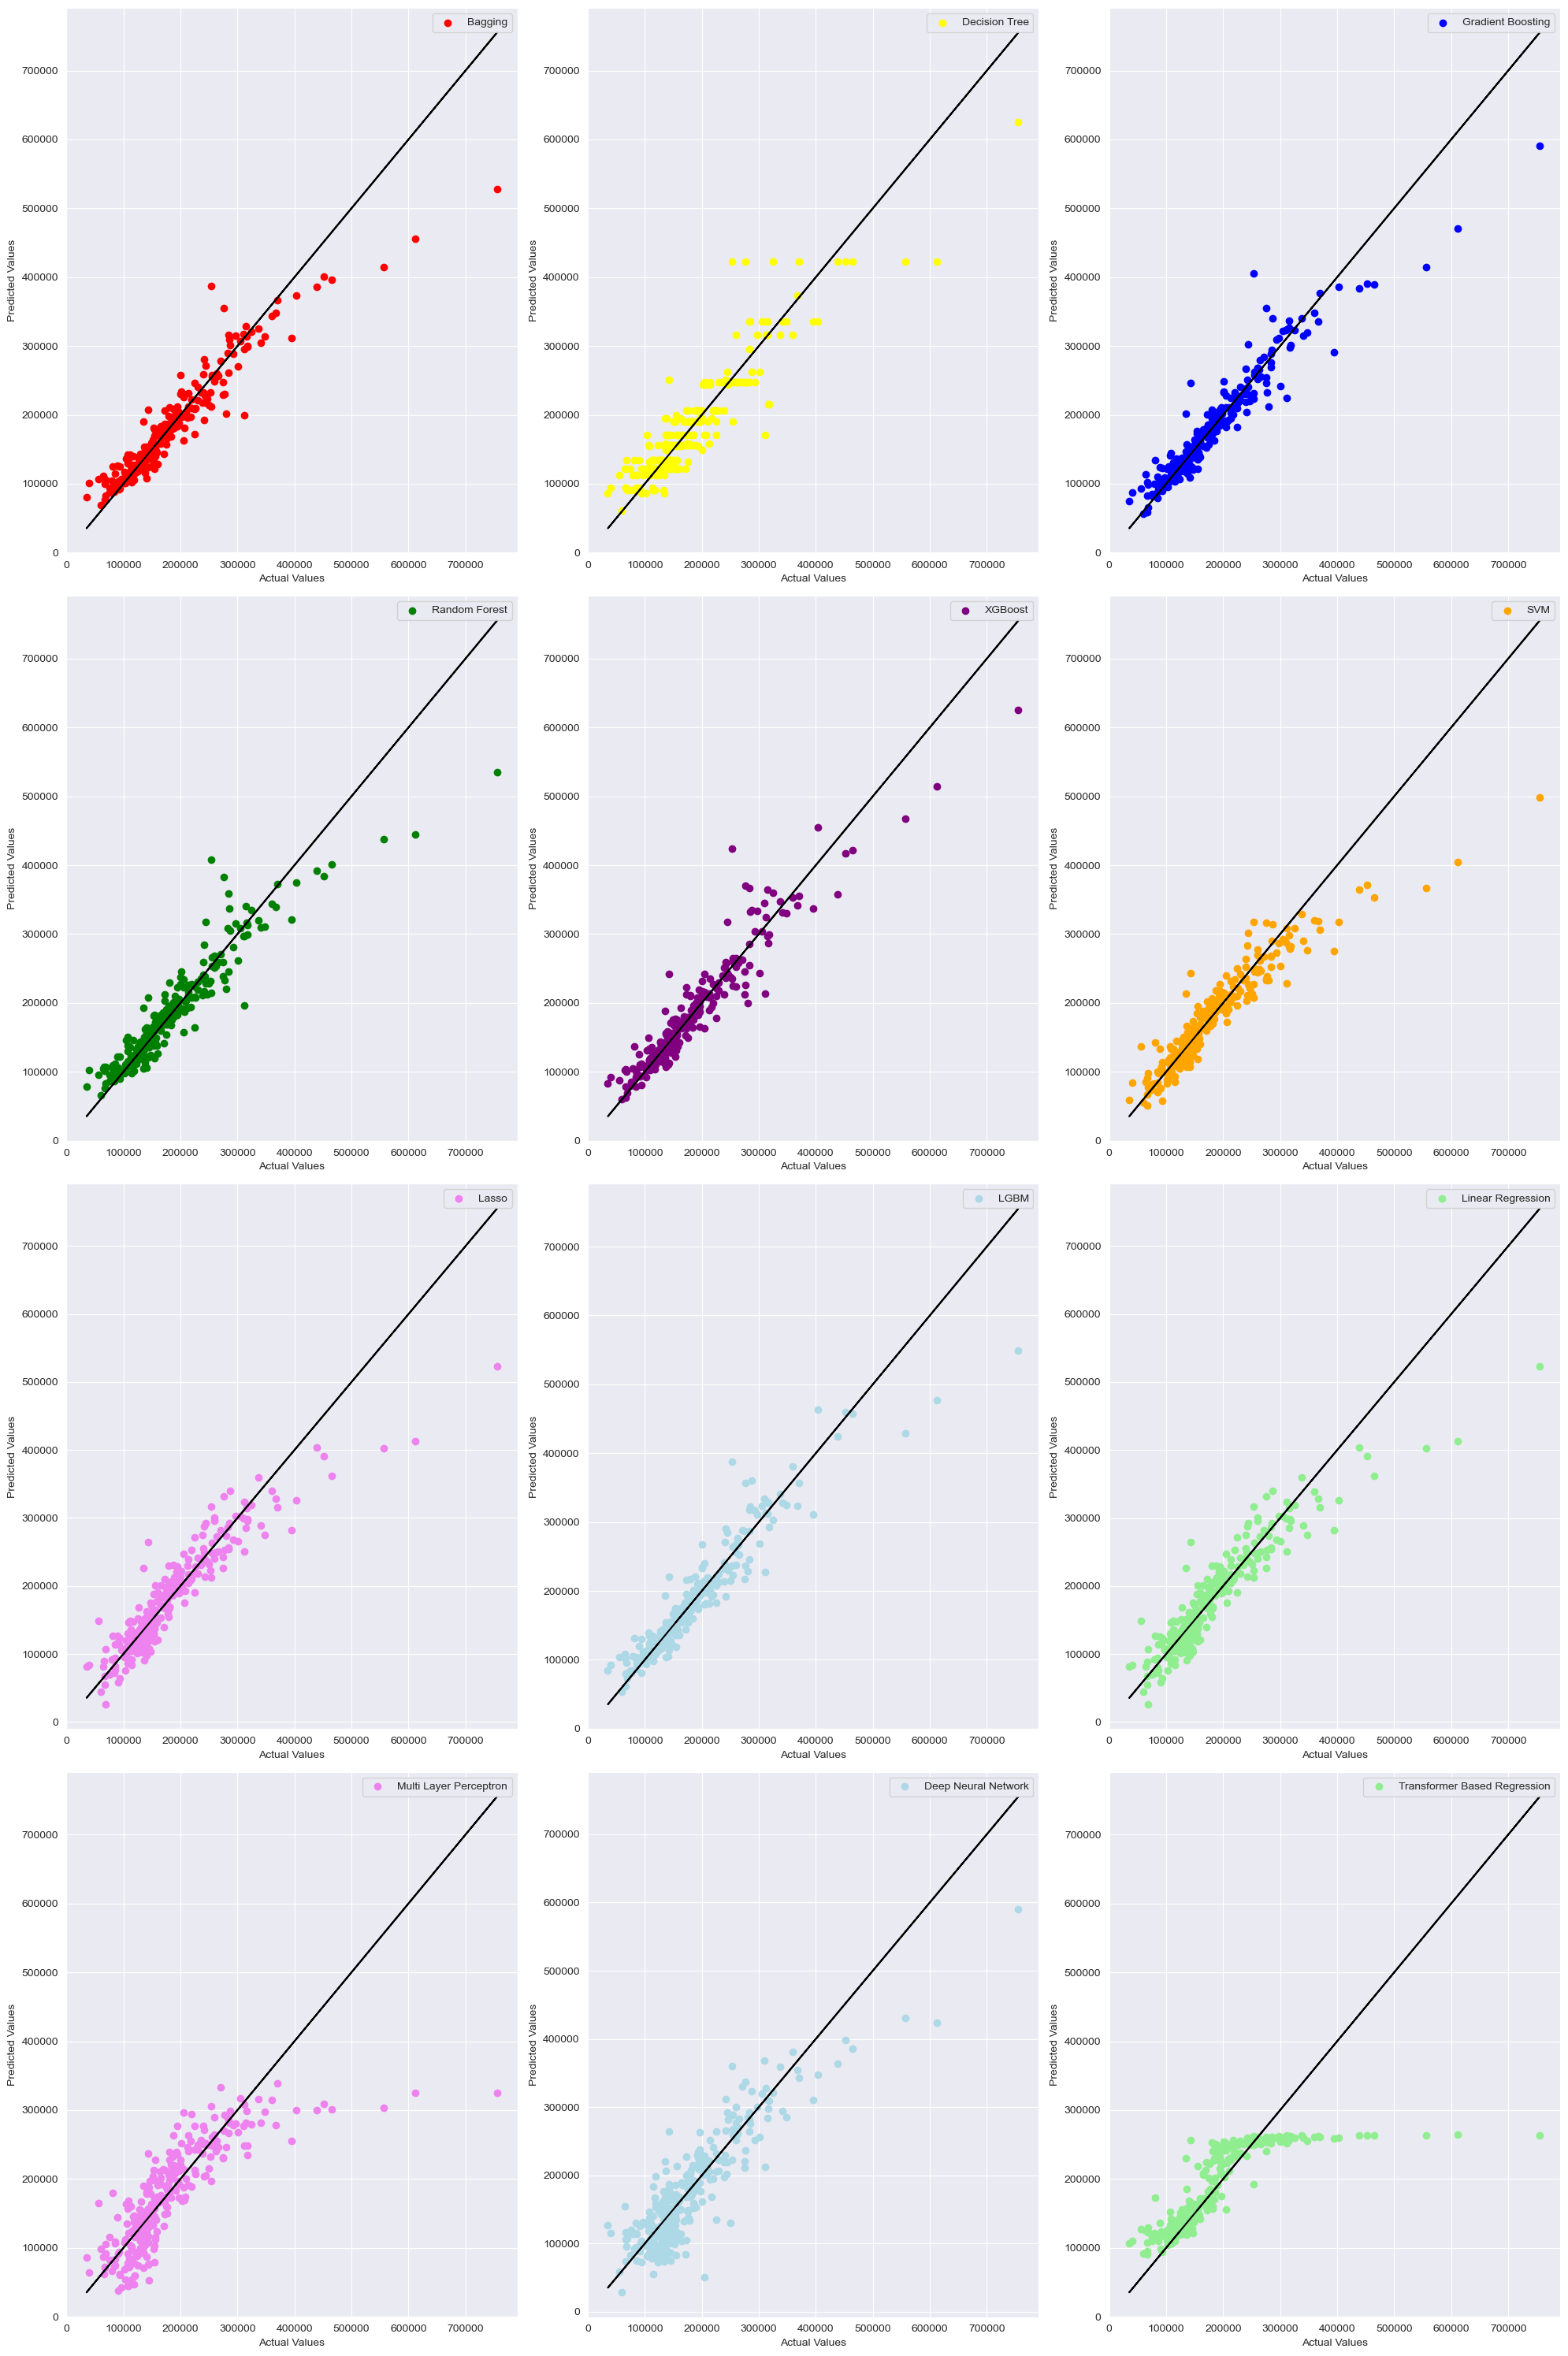

In [127]:
import matplotlib.pyplot as plt

# Define the figure and subplots
fig, ax = plt.subplots(4, 3, figsize=(20, 30))

# Scatter plot for each model's predictions
ax[0, 0].scatter(y_test, y_pred_bg, color='red', label='Bagging')
ax[0, 0].plot(y_test, y_test, color='black')
ax[0, 0].legend()

ax[0, 1].scatter(y_test, y_pred_dt, color='yellow', label='Decision Tree')
ax[0, 1].plot(y_test, y_test, color='black')
ax[0, 1].legend()

ax[0, 2].scatter(y_test, y_pred_gb, color='blue', label='Gradient Boosting')
ax[0, 2].plot(y_test, y_test, color='black')
ax[0, 2].legend()

ax[1, 0].scatter(y_test, y_pred_RM, color='green', label='Random Forest')
ax[1, 0].plot(y_test, y_test, color='black')
ax[1, 0].legend()

ax[1, 1].scatter(y_test, y_pred_XG, color='purple', label='XGBoost')
ax[1, 1].plot(y_test, y_test, color='black')
ax[1, 1].legend()

ax[1, 2].scatter(y_test, y_pred_svm, color='orange', label='SVM')
ax[1, 2].plot(y_test, y_test, color='black')
ax[1, 2].legend()

ax[2, 0].scatter(y_test, y_pred_lasso, color='violet', label='Lasso')
ax[2, 0].plot(y_test, y_test, color='black')
ax[2, 0].legend()

ax[2, 1].scatter(y_test, y_LGBM, color='lightblue', label='LGBM')
ax[2, 1].plot(y_test, y_test, color='black')
ax[2, 1].legend()

ax[2, 2].scatter(y_test, y_pred_lr, color='lightgreen', label='Linear Regression')
ax[2, 2].plot(y_test, y_test, color='black')
ax[2, 2].legend()

ax[3, 0].scatter(y_test, y_pred_mlp, color='violet', label='Multi Layer Perceptron')
ax[3, 0].plot(y_test, y_test, color='black')
ax[3, 0].legend()

ax[3, 1].scatter(y_test, y_pred_dnn, color='lightblue', label='Deep Neural Network')
ax[3, 1].plot(y_test, y_test, color='black')
ax[3, 1].legend()

ax[3, 2].scatter(y_test, y_pred_tbr, color='lightgreen', label='Transformer Based Regression')
ax[3, 2].plot(y_test, y_test, color='black')
ax[3, 2].legend()

# Set common labels
for ax_row in ax:
    for axi in ax_row:
        axi.set_xlabel('Actual Values')
        axi.set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()


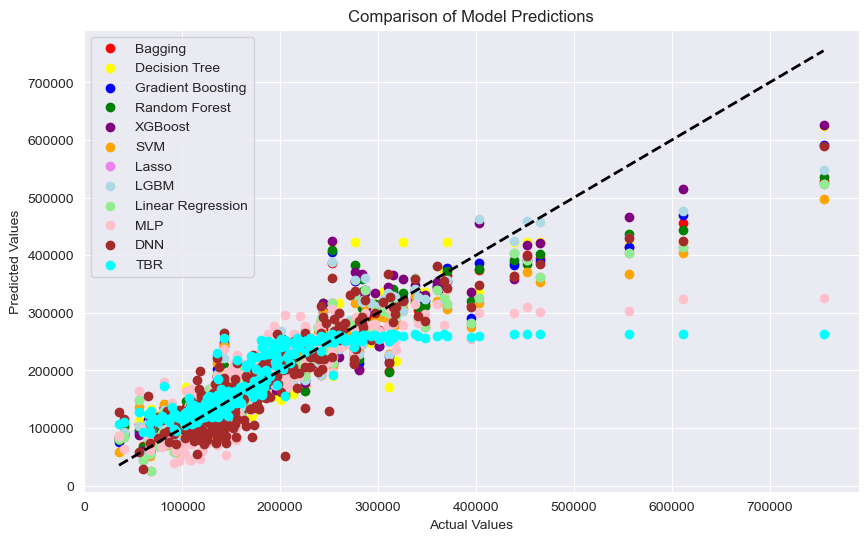

In [128]:
plt.figure(figsize=(10, 6))

# Scatter plot for each model's predictions

plt.scatter(y_test, y_pred_bg, color='red', label='Bagging')
plt.scatter(y_test, y_pred_dt, color='yellow', label='Decision Tree')
plt.scatter(y_test, y_pred_gb, color='blue', label='Gradient Boosting')
plt.scatter(y_test, y_pred_RM, color='green', label='Random Forest')
plt.scatter(y_test, y_pred_XG, color='purple', label='XGBoost')
plt.scatter(y_test, y_pred_svm, color='orange', label='SVM')
plt.scatter(y_test, y_pred_lasso, color='violet', label='Lasso')
plt.scatter(y_test, y_LGBM, color='lightblue', label='LGBM')
plt.scatter(y_test, y_pred_lr, color='lightgreen', label='Linear Regression')
plt.scatter(y_test, y_pred_mlp, color='pink', label='MLP')
plt.scatter(y_test, y_pred_dnn, color='brown', label='DNN')
plt.scatter(y_test, y_pred_tbr, color='cyan', label='TBR')

# Scatter plot for actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()


# Insights
 - Allmost all models are performing well for the Saleprices of range 0-35000.
 - Above 35000 SalePrice Gradient Boosting and XGBoost, Gradient Boosting model is performing comparitively well.

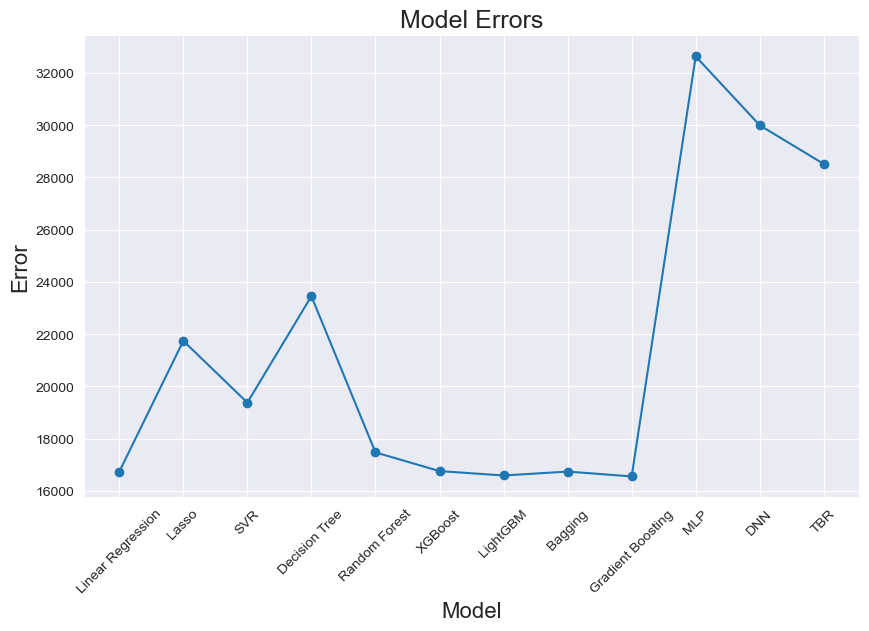

In [129]:
# Constructing the error DataFrame correctly
Y_error = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'SVR', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Bagging', 'Gradient Boosting', 'MLP', 'DNN', 'TBR'],
    'Errors': [y_lr, y_lasso, y_svm, y_dt, y_RM, y_XG, y_LG, y_bg, y_gb, y_mlp, y_dnn, y_tbr]
})

# Constructing the test and predictions DataFrame correctly
Y_test = pd.DataFrame({
    'y_test': y_test,
    'Linear Reg': y_pred_lr,
    'Lasso': y_pred_lasso,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_RM,
    'XGBoost': y_pred_XG,
    'LightGBM': y_pred_LG,
    'Bagging': y_pred_bg,
    'Gradient Boosting': y_pred_gb,
    'MLP': y_pred_mlp,
    'DNN': y_pred_dnn,
    'TBR': y_pred_tbr
})

# Plotting the error values
plt.figure(figsize=(10, 6))
plt.plot(Y_error['Model'], Y_error['Errors'], marker='o')
plt.xticks(rotation=45)
plt.ylabel('Error', fontsize=16)
plt.xlabel('Model', fontsize=16)
plt.title('Model Errors', fontsize=18)
plt.grid(True)
plt.show()


In [130]:
Y_error.sort_values(by=['Errors'])

Model        Errors
8   Gradient Boosting  16558.005803
6            LightGBM  16593.378226
0   Linear Regression  16735.372127
7             Bagging  16743.723313
5             XGBoost  16762.866438
4       Random Forest  17477.467911
2                 SVR  19382.093416
1               Lasso  21747.699482
3       Decision Tree  23457.323134
11                TBR  28517.040400
10                DNN  29998.171300
9                 MLP  32634.023204

In [131]:
data1 = {
    'Model': ['Linear Regression', 'Lasso', 'SVR', 'Decision Tree', 'Random Forest',
              'XGBoost', 'LightGBM', 'Bagging', 'Gradient Boosting', 'MLP', 'DNN', 'TBR'],
    'R2_Scores': [r2_score_lr, r2_score_svr, r2_score_dt, r2_score_rf, r2_score_XG,
                  r2_score_lgbm, r2_score_lgbm, r2_score_bg, r2_score_GB, r2_score_mlp,
                  r2_score_dnn, r2_score_tbr]
}

# Create the DataFrame
Y_R2_Scores = pd.DataFrame(data1)
Y_R2_Scores.sort_values(by=['R2_Scores'],ascending=False)

Model  R2_Scores
4       Random Forest   0.902831
8   Gradient Boosting   0.900644
5             XGBoost   0.897905
6            LightGBM   0.897905
7             Bagging   0.888109
3       Decision Tree   0.880030
0   Linear Regression   0.853117
1               Lasso   0.852384
2                 SVR   0.839775
10                DNN   0.786068
9                 MLP   0.653421
11                TBR   0.610071

# Conclusion

This report aims to develop and evaluate various predictive models for estimating house prices using the HousePrice dataset. We explored a variety of regression models, including Linear Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost, LightGBM, Support Vector Regression (SVR), Lasso Regression, Bagging Regressor, Deep Neural Network (DNN), and Multi-Layer Perceptron (MLP).

## Model Performance
After thorough analysis and tuning of the models, the following observations were made:

### LightGBM
- LightGBM emerged as the top performer with the lowest mean absolute error (MAE) and high R-squared value, indicating its strong predictive power and ability to handle the complexity of the dataset.

### Gradient Boosting
- Gradient Boosting provided competitive results, demonstrating its effectiveness in capturing the relationships in the data.

### Bagging Regressor
- The Bagging Regressor also performed well, leveraging multiple base estimators to reduce variance and avoid overfitting. It showed robust performance, closely trailing the Gradient Boosting model.

### XGBoost
- XGBoost demonstrated good performance with a good R-squared value and low mean absolute error (MAE). It efficiently handled the dataset's complexity and provided accurate predictions.

### Random Forest
- The Random Forest model also showed robust performance, closely following XGBoost and Bagging, due to its ability to reduce variance through ensemble learning.

### Support Vector Regression (SVR)
- SVR performed well in terms of error compared to Linear Regression and Lasso Regression but had a lower R-squared score.

### Decision Tree
- The Decision Tree model performed adequately but was outperformed by the ensemble methods.

### Lasso Regression
- Lasso Regression offered a good balance between performance and interpretability by enforcing feature selection through L1 regularization.

### Deep Neural Network (DNN) and Multi-Layer Perceptron (MLP)
- These models showed lower performance compared to the other models, indicating potential overfitting and complexity handling issues.

## Key Performance Metrics
Here are the key performance metrics for the best-performing models on the test set:

- **LightGBM:**
  - MAE: 16360.36
  - R-squared: 0.895

- **Gradient Boosting:**
  - MAE: 16407.48
  - R-squared: 0.895

- **Bagging Regressor:**
  - MAE: 16693.06
  - R-squared: 0.886

- **XGBoost:**
  - MAE: 16866.87
  - R-squared: 0.895

- **Random Forest:**
  - MAE: 17185.79
  - R-squared: 0.902

- **Linear Regression:**
  - MAE: 21589.24
  - R-squared: 0.851

- **Lasso Regression:**
  - MAE: 21585.83
  - R-squared: 0.847

- **Decision Tree:**
  - MAE: 22960.26
  - R-squared: 0.888

- **SVR:**
  - MAE: 19447.37
  - R-squared: 0.848

- **DNN:**
  - MAE: 24837.74
  - R-squared: 0.795

- **MLP:**
  - MAE: 30861.73
  - R-squared: 0.672

- **TBR:**
  - MAE: 21440.65
  - R-squared: 0.761

## Implications
The high accuracy of the LightGBM, Gradient Boosting, and Bagging Regressor models suggests they can be effectively used for predicting house prices, providing valuable tools for real estate professionals, investors, and homebuyers. Accurate price predictions can enhance decision-making, market analysis, and investment strategies.

## Challenges
Despite the robust performance of the models, there are several limitations to consider:

- **Data Quality:** The models rely heavily on the quality of the input data. Any missing values or biases in the data could affect the predictions.
- **Feature Engineering:** Some potentially predictive features might have been excluded due to preprocessing steps. Further feature engineering could improve model performance.
- **Generalizability:** The models are trained on a specific dataset, and their generalizability to other regions or housing markets may be limited.
- **Hyperparameter Tuning:** The models' performance didn't increase significantly or remained unaltered after tuning the parameters.

In conclusion, the developed models, particularly LightGBM and Gradient Boosting, demonstrate significant potential for accurately predicting house prices. These models provide valuable tools for the real estate industry, offering insights and predictions that can guide investment and purchasing decisions. Continuous improvement and adaptation of these models will ensure they remain effective and relevant in dynamic market conditions.

## Recommendations
To further improve the predictive models, the following steps are recommended:

- Including more relevant features, such as economic indicators or more granular location data, could enhance model accuracy.
- Exploring more advanced algorithms, such as neural networks or ensemble methods combining different types of models, could provide better results.
- Continuously updating the models with new data will help maintain their accuracy and relevance in changing market conditions.
- Enhancing the interpretability of the models will provide better insights into the factors driving house prices, aiding stakeholders in making informed decisions.
